## Create a complete list of ICSEA scores which will be used for all the schools in our datasets from 2016-2020

In [1]:
# import the required libraries
import pandas as pd
from sqlalchemy import create_engine, inspect
from config import username, password

In [2]:
# get the 2019 url WA school ranking
rank_2019 = "https://bettereducation.com.au/school/secondary/wa/wa_top_secondary_schools.aspx?yr=2019"

# Use panda's `read_html` to parse the 2019 ranking url where the ICSEA scores are listed (years 2016 to 2018 have no ICSEA scores)
icsea_2019 = pd.read_html(rank_2019, header=0)[0]
icsea_2019

,School,Postcode,State Overall Score,English,Maths,Total Enrolments,Trend / Compare,Sector,ICSEA
0,Perth Modern School,6008,100,NaN,NaN,1418,Trend / Compare,Government,1239.0
1,"St Hilda's Anglican School for Girls (Inc),Mos...",6012,100,NaN,NaN,1087,Trend / Compare,Non-government,1197.0
2,Christ Church Grammar School,6010,100,NaN,NaN,1646,Trend / Compare,Non-government,1180.0
3,Rossmoyne Senior High School,6148,100,NaN,NaN,2188,Trend / Compare,Government,1121.0
4,"St Mary's Anglican Girls' School (Inc),Karriny...",6018,100,NaN,NaN,1414,Trend / Compare,Non-government,1158.0
...,...,...,...,...,...,...,...,...,...
89,"Swan Valley Anglican Community School,Aveley,W...",6069,90,NaN,NaN,1031,Trend / Compare,Non-government,1045.0
90,Boyup Brook District High School,6244,90,NaN,NaN,162,Trend / Compare,Government,1002.0
91,"Mater Dei College,Edgewater,WA,6027",6027,90,NaN,NaN,804,Trend / Compare,Non-government,1055.0
92,"Emmanuel Catholic College,Beeliar,WA,6164",6164,90,NaN,NaN,1061,Trend / Compare,Non-government,1036.0


In [3]:
# replace the values of "Australian Islamic College" to correct the spelling to prevent Null values when performing the merge with other Dataframes later on
icsea_2019["School"].replace({"Australian Islamic College (Kewdale),Kewdale,WA,6105": "Australian Islamic College - Kewdale",
                              "Australian Islamic College (Thornlie),Thornlie,WA,6108": "Australian Islamic College - Thornlie"
                                    }, inplace=True)

In [4]:
# Convert the values in the "ICSEA" column to a String
icsea_2019["ICSEA"] = icsea_2019["ICSEA"].astype(str)

# Remove other strings before "." to show only the ICSEA values
icsea_2019["ICSEA"] = icsea_2019["ICSEA"].str.split('.', 1).str.get(0)
icsea_2019

,School,Postcode,State Overall Score,English,Maths,Total Enrolments,Trend / Compare,Sector,ICSEA
0,Perth Modern School,6008,100,NaN,NaN,1418,Trend / Compare,Government,1239
1,"St Hilda's Anglican School for Girls (Inc),Mos...",6012,100,NaN,NaN,1087,Trend / Compare,Non-government,1197
2,Christ Church Grammar School,6010,100,NaN,NaN,1646,Trend / Compare,Non-government,1180
3,Rossmoyne Senior High School,6148,100,NaN,NaN,2188,Trend / Compare,Government,1121
4,"St Mary's Anglican Girls' School (Inc),Karriny...",6018,100,NaN,NaN,1414,Trend / Compare,Non-government,1158
...,...,...,...,...,...,...,...,...,...
89,"Swan Valley Anglican Community School,Aveley,W...",6069,90,NaN,NaN,1031,Trend / Compare,Non-government,1045
90,Boyup Brook District High School,6244,90,NaN,NaN,162,Trend / Compare,Government,1002
91,"Mater Dei College,Edgewater,WA,6027",6027,90,NaN,NaN,804,Trend / Compare,Non-government,1055
92,"Emmanuel Catholic College,Beeliar,WA,6164",6164,90,NaN,NaN,1061,Trend / Compare,Non-government,1036


In [5]:
# Remove the strings after the "," to show only the school name
icsea_2019["School"] = icsea_2019["School"].str.split(',', 1).str.get(0)
icsea_2019

,School,Postcode,State Overall Score,English,Maths,Total Enrolments,Trend / Compare,Sector,ICSEA
0,Perth Modern School,6008,100,NaN,NaN,1418,Trend / Compare,Government,1239
1,St Hilda's Anglican School for Girls (Inc),6012,100,NaN,NaN,1087,Trend / Compare,Non-government,1197
2,Christ Church Grammar School,6010,100,NaN,NaN,1646,Trend / Compare,Non-government,1180
3,Rossmoyne Senior High School,6148,100,NaN,NaN,2188,Trend / Compare,Government,1121
4,St Mary's Anglican Girls' School (Inc),6018,100,NaN,NaN,1414,Trend / Compare,Non-government,1158
...,...,...,...,...,...,...,...,...,...
89,Swan Valley Anglican Community School,6069,90,NaN,NaN,1031,Trend / Compare,Non-government,1045
90,Boyup Brook District High School,6244,90,NaN,NaN,162,Trend / Compare,Government,1002
91,Mater Dei College,6027,90,NaN,NaN,804,Trend / Compare,Non-government,1055
92,Emmanuel Catholic College,6164,90,NaN,NaN,1061,Trend / Compare,Non-government,1036


In [6]:
# Remove the "space" and "string inside parenthesis" to show only the school name
icsea_2019["School"] = icsea_2019["School"].str.split('\s+\(', 1).str.get(0)
icsea_2019

,School,Postcode,State Overall Score,English,Maths,Total Enrolments,Trend / Compare,Sector,ICSEA
0,Perth Modern School,6008,100,NaN,NaN,1418,Trend / Compare,Government,1239
1,St Hilda's Anglican School for Girls,6012,100,NaN,NaN,1087,Trend / Compare,Non-government,1197
2,Christ Church Grammar School,6010,100,NaN,NaN,1646,Trend / Compare,Non-government,1180
3,Rossmoyne Senior High School,6148,100,NaN,NaN,2188,Trend / Compare,Government,1121
4,St Mary's Anglican Girls' School,6018,100,NaN,NaN,1414,Trend / Compare,Non-government,1158
...,...,...,...,...,...,...,...,...,...
89,Swan Valley Anglican Community School,6069,90,NaN,NaN,1031,Trend / Compare,Non-government,1045
90,Boyup Brook District High School,6244,90,NaN,NaN,162,Trend / Compare,Government,1002
91,Mater Dei College,6027,90,NaN,NaN,804,Trend / Compare,Non-government,1055
92,Emmanuel Catholic College,6164,90,NaN,NaN,1061,Trend / Compare,Non-government,1036


In [7]:
# re-arrange the columns & remove other columns
icsea = icsea_2019[['School', 'ICSEA']]
icsea

,School,ICSEA
0,Perth Modern School,1239
1,St Hilda's Anglican School for Girls,1197
2,Christ Church Grammar School,1180
3,Rossmoyne Senior High School,1121
4,St Mary's Anglican Girls' School,1158
...,...,...
89,Swan Valley Anglican Community School,1045
90,Boyup Brook District High School,1002
91,Mater Dei College,1055
92,Emmanuel Catholic College,1036


In [8]:
# read "school_coordinates" csv file
icsea_additional = pd.read_csv("../Resources/icsea_additional.csv")
icsea_additional

,School,ICSEA
0,Heritage College Perth,1028
1,Alkimos Baptist College,1035
2,Margaret River Senior High School,1037
3,Bunbury Catholic College,1035
4,Kalbarri District High School,988
...,...,...
94,Manea Senior College,1022
95,Mindarie Senior College,1034
96,Our Lady of Mercy College,1035
97,Sevenoaks Senior College,976


In [9]:
# Merge by concat the "icsea" Dataframe with "icsea_update" Dataframe
icsea_full = pd.concat([icsea, icsea_additional])

In [10]:
# Display the merged Dataframe
icsea_full

,School,ICSEA
0,Perth Modern School,1239
1,St Hilda's Anglican School for Girls,1197
2,Christ Church Grammar School,1180
3,Rossmoyne Senior High School,1121
4,St Mary's Anglican Girls' School,1158
...,...,...
94,Manea Senior College,1022
95,Mindarie Senior College,1034
96,Our Lady of Mercy College,1035
97,Sevenoaks Senior College,976


In [11]:
# Check for duplicates
icsea_full[icsea_full.duplicated(keep=False)]

,School,ICSEA


In [12]:
# check for "nan" values which is a known value in the 2019 rankings dataset for Woodthorpe School
# "nan" values are not considered Null (as opposed to "Nan") so it has to be searched manually
icsea_full.loc[icsea_full["ICSEA"] == "nan", :]

,School,ICSEA
34,Woodthorpe School,nan


In [13]:
# replaced "nan" with 983 which is the ICSEA score for Woodthorpe School
icsea_full = icsea_full.replace('nan', 983)

In [14]:
# check for "nan" values after replacing the value to double check
icsea_full.loc[icsea_full["ICSEA"] == "nan", :]

,School,ICSEA


In [15]:
# replace some values to correct the spelling# replace some values to correct the spelling to prevent Null values when performing the merge with other Dataframes later on
icsea_full["School"].replace({"John Curtin College Of The Arts": "John Curtin College of the Arts", 
                       "Australian Christian College": "Australian Christian College - Southlands",
                       "St Stephen's School": "St Stephen's School - Duncraig",
                       "Schools Of Isolated & Distance Education": "School of Isolated and Distance Education",
                       "St Mary MacKillop College": "St Mary Mackillop College"
                        }, inplace=True)

In [16]:
# Display the "icsea_full" Dataframe
icsea_full

,School,ICSEA
0,Perth Modern School,1239
1,St Hilda's Anglican School for Girls,1197
2,Christ Church Grammar School,1180
3,Rossmoyne Senior High School,1121
4,St Mary's Anglican Girls' School,1158
...,...,...
94,Manea Senior College,1022
95,Mindarie Senior College,1034
96,Our Lady of Mercy College,1035
97,Sevenoaks Senior College,976


## Create a complete list of school coordinates from the Department of Education which will be used for all the schools in our datasets from 2016-2020

In [17]:
# read "doe_2020" csv file
doe = pd.read_csv("../Resources/doe_2020.csv")
doe

,Code,School Name,Street,Suburb,State,Postcode,Postal Street,Postal Suburb,Postal State,Postal Postcode,Latitude,Longitude,Phone,Education Region,Broad Classification,Classification Group,Low Year,High Year
0,5001,ADAM ROAD PRIMARY SCHOOL,HOTCHIN STREET,SOUTH BUNBURY,WA,6230,HOTCHIN STREET,SOUTH BUNBURY,WA,6230,-33.357951,115.635371,08 9796 3000,SOUTH WEST,Primary Schools,PRIMARY SCHOOLS,KIN,Y06
1,1397,AL-HIDAYAH ISLAMIC SCHOOL,CNR HEDLEY ST/NYAMUP WAY,BENTLEY,WA,6102,CNR HEDLEY ST/NYAMUP WAY,BENTLEY,WA,6102,-32.010358,115.911564,08 9351 8593,SOUTH METROPOLITAN,NON-GOVT SCHOOLS,NON-GOVERNMENT,PPR,Y06
2,8001,ALBANY COMMUNITY KINDERGARTEN,136 SERPENTINE ROAD,ALBANY,WA,6330,PO BOX 5670,ALBANY,WA,6332,-35.021460,117.880987,08 9841 1864,SOUTH WEST,Community Kindergartens,COMMUNITY KINDERGARTENS,KIN,KIN
3,5002,ALBANY PRIMARY SCHOOL,SUFFOLK STREET,ALBANY,WA,6330,SUFFOLK STREET,ALBANY,WA,6330,-35.018212,117.891611,08 9844 2860,SOUTH WEST,Primary Schools,PRIMARY SCHOOLS,KIN,Y06
4,6151,ALBANY SECONDARY EDUCATION SUPPORT CENTRE,65 ANSON ROAD,ALBANY,WA,6330,65 ANSON ROAD,ALBANY,WA,6330,-34.990749,117.866867,08 9841 4900,SOUTH WEST,Education Support Centres,EDUCATION SUPPORT,Y07,Y12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,1497,YOUTH FUTURES COMMUNITY SCHOOL,59 KEY LARGO DRIVE,CLARKSON,WA,6030,59 KEY LARGO DRIVE,CLARKSON,WA,6030,-31.691100,115.719850,08 9407 9099,NORTH METROPOLITAN,NON-GOVT SCHOOLS,NON-GOVERNMENT,Y09,Y12
1133,4127,YULE BROOK COLLEGE,61 DELLAR ROAD,MADDINGTON,WA,6109,61 DELLAR ROAD,MADDINGTON,WA,6109,-32.047327,116.006462,08 9251 8333,SOUTH METROPOLITAN,High Schools,SECONDARY SCHOOLS,Y07,Y10
1134,5787,YULGA JINNA REMOTE COMMUNITY SCHOOL,YULGA JINNA REMOTE COMMUNITY,YULGA JINNA REMOTE COMMUNITY,WA,6642,VIA MEEKATHARRA,MEEKATHARRA,WA,6642,-25.617306,118.557728,08 9981 2200,MIDWEST,Remote Community Schools,PRIMARY SCHOOLS,KIN,Y07
1135,5217,YULUMA PRIMARY SCHOOL,21 AMBROSE STREET,INNALOO,WA,6018,21 AMBROSE STREET,INNALOO,WA,6018,-31.892268,115.789990,08 9244 5422,NORTH METROPOLITAN,Primary Schools,PRIMARY SCHOOLS,KIN,Y06


In [18]:
# remove other columns
doe = doe[["School Name", "Suburb", "Longitude", "Latitude"]]
doe

,School Name,Suburb,Longitude,Latitude
0,ADAM ROAD PRIMARY SCHOOL,SOUTH BUNBURY,115.635371,-33.357951
1,AL-HIDAYAH ISLAMIC SCHOOL,BENTLEY,115.911564,-32.010358
2,ALBANY COMMUNITY KINDERGARTEN,ALBANY,117.880987,-35.021460
3,ALBANY PRIMARY SCHOOL,ALBANY,117.891611,-35.018212
4,ALBANY SECONDARY EDUCATION SUPPORT CENTRE,ALBANY,117.866867,-34.990749
...,...,...,...,...
1132,YOUTH FUTURES COMMUNITY SCHOOL,CLARKSON,115.719850,-31.691100
1133,YULE BROOK COLLEGE,MADDINGTON,116.006462,-32.047327
1134,YULGA JINNA REMOTE COMMUNITY SCHOOL,YULGA JINNA REMOTE COMMUNITY,118.557728,-25.617306
1135,YULUMA PRIMARY SCHOOL,INNALOO,115.789990,-31.892268


In [19]:
# rename the "School Name" column name
doe = doe.rename(columns = {"School Name" : "School"})
doe

,School,Suburb,Longitude,Latitude
0,ADAM ROAD PRIMARY SCHOOL,SOUTH BUNBURY,115.635371,-33.357951
1,AL-HIDAYAH ISLAMIC SCHOOL,BENTLEY,115.911564,-32.010358
2,ALBANY COMMUNITY KINDERGARTEN,ALBANY,117.880987,-35.021460
3,ALBANY PRIMARY SCHOOL,ALBANY,117.891611,-35.018212
4,ALBANY SECONDARY EDUCATION SUPPORT CENTRE,ALBANY,117.866867,-34.990749
...,...,...,...,...
1132,YOUTH FUTURES COMMUNITY SCHOOL,CLARKSON,115.719850,-31.691100
1133,YULE BROOK COLLEGE,MADDINGTON,116.006462,-32.047327
1134,YULGA JINNA REMOTE COMMUNITY SCHOOL,YULGA JINNA REMOTE COMMUNITY,118.557728,-25.617306
1135,YULUMA PRIMARY SCHOOL,INNALOO,115.789990,-31.892268


In [20]:
# change the "School" & "Suburb" columns values format to a title format
doe['School'] = doe['School'].str.title()
doe['Suburb'] = doe['Suburb'].str.title()
doe

,School,Suburb,Longitude,Latitude
0,Adam Road Primary School,South Bunbury,115.635371,-33.357951
1,Al-Hidayah Islamic School,Bentley,115.911564,-32.010358
2,Albany Community Kindergarten,Albany,117.880987,-35.021460
3,Albany Primary School,Albany,117.891611,-35.018212
4,Albany Secondary Education Support Centre,Albany,117.866867,-34.990749
...,...,...,...,...
1132,Youth Futures Community School,Clarkson,115.719850,-31.691100
1133,Yule Brook College,Maddington,116.006462,-32.047327
1134,Yulga Jinna Remote Community School,Yulga Jinna Remote Community,118.557728,-25.617306
1135,Yuluma Primary School,Innaloo,115.789990,-31.892268


In [21]:
# replace some values to correct the spelling to prevent Null values when performing the merge with other Dataframes later on
doe["School"].replace({"Irene Mccormack Catholic College": "Irene McCormack Catholic College",
                       "John Xxiii College": "John XXIII College",
                       "Oneschool Global Wa": "OneSchool Global WA",
                       "Our Lady Of Mercy College": "Our Lady of Mercy College",
                       "Peter Moyes Anglican Community": "Peter Moyes Anglican Community School",
                       "Presbyterian Ladies College": "Presbyterian Ladies' College",
                       "St Andrew'S Grammar": "St Andrew's Grammar",
                       "St Brigid'S College": "St Brigid's College",
                       "St Hilda'S Anglican School For Girls": "St Hilda's Anglican School for Girls",
                       "St Joseph'S College": "St Joseph's College",
                       "St Luke'S College": "St Luke's College",
                       "St Mark'S Anglican Community School": "St Mark's Anglican Community School",
                       "St Mary'S Anglican Girls' School": "St Mary's Anglican Girls' School",
                       "St Stephen'S School": "St Stephen's School - Duncraig",
                       "Swan Valley Anglican Community": "Swan Valley Anglican Community School",
                       "John Curtin College Of The Arts": "John Curtin College of the Arts",
                       "Australian Islamic College - North Of The River": "Australian Islamic College - Dianella",
                       "Australian Islamic College - Perth": "Australian Islamic College - Thornlie",
                       "St George'S Anglican Grammar School": "St George's Anglican Grammar School",
                       "International School Of Western Australia": "International School of Western Australia",
                       "School Of Isolated And Distance Education": "School of Isolated and Distance Education",
                       "Cornerstone Christian College Ltd": "Cornerstone Christian College"                    
                       }, inplace=True)

In [22]:
# create a new Dataframe with new entries to be added to the "doe" Dataframe
doe_update = pd.DataFrame({"School": ["Woodthorpe School", "St Stephen's School - Carramar", "Bunbury John Calvin School"],
                           "Suburb": ["Willetton", "Carramar", "Carey Park"],
                           "Longitude": [115.90172, 115.78828, 115.64956],
                           "Latitude": [-32.05654, -31.71704, -33.35097]
                            })
doe_update

,School,Suburb,Longitude,Latitude
0,Woodthorpe School,Willetton,115.90172,-32.05654
1,St Stephen's School - Carramar,Carramar,115.78828,-31.71704
2,Bunbury John Calvin School,Carey Park,115.64956,-33.35097


In [23]:
# append "doe_update" Dataframe to "doe" Dataframe
school_coordinates = doe.append(doe_update)
school_coordinates

,School,Suburb,Longitude,Latitude
0,Adam Road Primary School,South Bunbury,115.635371,-33.357951
1,Al-Hidayah Islamic School,Bentley,115.911564,-32.010358
2,Albany Community Kindergarten,Albany,117.880987,-35.021460
3,Albany Primary School,Albany,117.891611,-35.018212
4,Albany Secondary Education Support Centre,Albany,117.866867,-34.990749
...,...,...,...,...
1135,Yuluma Primary School,Innaloo,115.789990,-31.892268
1136,Yuna Primary School,Yuna,115.002648,-28.326566
0,Woodthorpe School,Willetton,115.901720,-32.056540
1,St Stephen's School - Carramar,Carramar,115.788280,-31.717040


## Open the manually created "sectors.csv" file which will be merged to all our datasets from 2016-2020

In [24]:
# read "sectors" csv file
sectors = pd.read_csv("../Resources/sectors.csv")
sectors

,School,Sector,Gender,Religion
0,Mercedes College,Non-government,Girls,Catholic
1,Wesley College,Non-government,Boys,Christian
2,Penrhos College,Non-government,Girls,Uniting
3,Newman College,Non-government,Co-ed,Catholic
4,St Norbert College,Non-government,Co-ed,Catholic
...,...,...,...,...
188,Bruce Rock District High School,Government,Co-ed,Secular
189,Shark Bay School,Government,Co-ed,Secular
190,Pemberton District High School,Government,Co-ed,Secular
191,Bunbury John Calvin School,Non-government,Co-ed,Christian


## Extract/scrape the ATAR WA High School rankings from 2016 - 2020 & create tables which are to be loaded to the SQL database later on

In [25]:
# get the 2020 url WA schools
url_secondary_wa_2020 ="https://bettereducation.com.au/Results/WA/wace.aspx?yr=2020"

# Use panda's `read_html` to parse the 2020 ATAR url
secondary_wa_2020 = pd.read_html(url_secondary_wa_2020, header=0)[0]

# rename the "Unnamed: 0" column name
secondary_wa_2020 = secondary_wa_2020.rename(columns = {"Unnamed: 0" : "Year"})

# replace the values of the "Year" column
secondary_wa_2020['Year'] = 2020
secondary_wa_2020

,Year,Better Education Rank,School,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,% students with an ATAR,Trend / Compare
0,2020,1,Perth Modern School,97.55,242,242,100.00,Trend / Compare
1,2020,2,St Hilda's Anglican School for Girls,92.70,147,134,91.16,Trend / Compare
2,2020,3,Christ Church Grammar School,92.50,190,175,92.11,Trend / Compare
3,2020,4,Penrhos College,90.65,135,116,85.93,Trend / Compare
4,2020,5,Methodist Ladies' College,90.55,126,112,88.89,Trend / Compare
...,...,...,...,...,...,...,...,...
134,2020,135,Balcatta Senior High School,60.40,76,20,26.32,Trend / Compare
135,2020,136,Safety Bay Senior High School,58.75,115,23,20.00,Trend / Compare
136,2020,137,Darling Range Sports College,52.40,129,44,34.11,Trend / Compare
137,2020,138,Gilmore College,52.25,141,23,16.31,Trend / Compare


In [26]:
# rename some column names to prevent issues when uploading the data to PostgreSQL later on (eg. % will cause an error)
secondary_wa_2020 = secondary_wa_2020.rename(columns = {"Better Education Rank" : "Rank",
                                                          "% students with an ATAR" : "Percentage of students with an ATAR"})

# re-arrange the columns & delete the column "Trend / Compare" since it's not required
secondary_wa_2020 = secondary_wa_2020[['School', 'Year', 'Rank', 'Median ATAR','No. eligible Yr 12 students', 'No. Students with an ATAR', 'Percentage of students with an ATAR']]
secondary_wa_2020

,School,Year,Rank,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR
0,Perth Modern School,2020,1,97.55,242,242,100.00
1,St Hilda's Anglican School for Girls,2020,2,92.70,147,134,91.16
2,Christ Church Grammar School,2020,3,92.50,190,175,92.11
3,Penrhos College,2020,4,90.65,135,116,85.93
4,Methodist Ladies' College,2020,5,90.55,126,112,88.89
...,...,...,...,...,...,...,...
134,Balcatta Senior High School,2020,135,60.40,76,20,26.32
135,Safety Bay Senior High School,2020,136,58.75,115,23,20.00
136,Darling Range Sports College,2020,137,52.40,129,44,34.11
137,Gilmore College,2020,138,52.25,141,23,16.31


In [27]:
# replace some values to correct the spelling to prevent Null values when performing the merge with other Dataframes later on
secondary_wa_2020["School"].replace({"Australian Islamic College": "Australian Islamic College - Dianella", 
                       "Christian Brothers College,Fremantle,WA,6160": "Christian Brothers' College",
                       "Australian Islamic College (Kewdale)": "Australian Islamic College - Kewdale",
                       "Serpentine-Jarrahdale Grammar School": "Court Grammar School",
                       "Western Australian College of Agriculture (Cunderdin)": "Western Australian College Of Agriculture - Cunderdin",
                       "Carey Baptist College,Harrisdale,WA,6112": "Carey Baptist College",
                       "St Mary MacKillop College": "St Mary Mackillop College",
                       "John Curtin College Of The Arts": "John Curtin College of The Arts",
                       "St Stephen's School (Carramar)": "St Stephen's School - Carramar",
                       "St Stephen's School (Duncraig)": "St Stephen's School - Duncraig",
                       "St Stephen's School": "St Stephen's School - Carramar",
                       "Irene McCormack Catholic Colle": "Irene McCormack Catholic College",
                       "Swan Valley Anglican Community": "Swan Valley Anglican Community School",
                       "John Curtin College Of The Arts": "John Curtin College of the Arts",
                       "Peter Moyes Anglican Community": "Peter Moyes Anglican Community School",
                       "Great Southern Grammar School": "Great Southern Grammar"
                        }, inplace=True)

In [28]:
# Merge "secondary_wa_2020" & "school_coordinates" Dataframes
wa_hs_atar_2020_coord = pd.merge(secondary_wa_2020, school_coordinates, on='School', how='left')
wa_hs_atar_2020_coord

,School,Year,Rank,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR,Suburb,Longitude,Latitude
0,Perth Modern School,2020,1,97.55,242,242,100.00,Subiaco,115.836396,-31.945066
1,St Hilda's Anglican School for Girls,2020,2,92.70,147,134,91.16,Mosman Park,115.767812,-32.005047
2,Christ Church Grammar School,2020,3,92.50,190,175,92.11,Claremont,115.776987,-31.985461
3,Penrhos College,2020,4,90.65,135,116,85.93,Como,115.872539,-31.997431
4,Methodist Ladies' College,2020,5,90.55,126,112,88.89,Claremont,115.775540,-31.987012
...,...,...,...,...,...,...,...,...,...,...
134,Balcatta Senior High School,2020,135,60.40,76,20,26.32,Balcatta,115.812243,-31.875517
135,Safety Bay Senior High School,2020,136,58.75,115,23,20.00,Safety Bay,115.740964,-32.303286
136,Darling Range Sports College,2020,137,52.40,129,44,34.11,Forrestfield,116.010860,-31.975661
137,Gilmore College,2020,138,52.25,141,23,16.31,Orelia,115.814803,-32.238266


In [29]:
# Check for NaN values
# creating bool series True for NaN values  
bool_series = pd.isnull(wa_hs_atar_2020_coord["Longitude"])  
    
# filtering data  
# displaying data only with Gender = NaN  
wa_hs_atar_2020_coord[bool_series]

,School,Year,Rank,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR,Suburb,Longitude,Latitude


In [30]:
# Merge both "wa_hs_atar_2020_coord" & "sectors" Dataframes
wa_hs_atar_2020 = pd.merge(wa_hs_atar_2020_coord, sectors, on='School', how='left')
wa_hs_atar_2020

,School,Year,Rank,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR,Suburb,Longitude,Latitude,Sector,Gender,Religion
0,Perth Modern School,2020,1,97.55,242,242,100.00,Subiaco,115.836396,-31.945066,Government,Co-ed,Secular
1,St Hilda's Anglican School for Girls,2020,2,92.70,147,134,91.16,Mosman Park,115.767812,-32.005047,Non-government,Girls,Anglican
2,Christ Church Grammar School,2020,3,92.50,190,175,92.11,Claremont,115.776987,-31.985461,Non-government,Boys,Anglican
3,Penrhos College,2020,4,90.65,135,116,85.93,Como,115.872539,-31.997431,Non-government,Girls,Uniting
4,Methodist Ladies' College,2020,5,90.55,126,112,88.89,Claremont,115.775540,-31.987012,Non-government,Girls,Methodist
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Balcatta Senior High School,2020,135,60.40,76,20,26.32,Balcatta,115.812243,-31.875517,Government,Co-ed,Secular
135,Safety Bay Senior High School,2020,136,58.75,115,23,20.00,Safety Bay,115.740964,-32.303286,Government,Co-ed,Secular
136,Darling Range Sports College,2020,137,52.40,129,44,34.11,Forrestfield,116.010860,-31.975661,Government,Co-ed,Secular
137,Gilmore College,2020,138,52.25,141,23,16.31,Orelia,115.814803,-32.238266,Government,Co-ed,Secular


In [31]:
# Check for NaN values
# creating bool series True for NaN values  
bool_series = pd.isnull(wa_hs_atar_2020["Sector"])  
    
# filtering data  
# displaying data only with Gender = NaN  
wa_hs_atar_2020[bool_series]

,School,Year,Rank,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR,Suburb,Longitude,Latitude,Sector,Gender,Religion


In [32]:
# get the 2019 url WA schools
url_secondary_wa_2019 ="https://bettereducation.com.au/Results/WA/wace.aspx?yr=2019"

# Use panda's `read_html` to parse the 2019 ATAR url
secondary_wa_2019 = pd.read_html(url_secondary_wa_2019, header=0)[0]

# rename the "Unnamed: 0" column name
secondary_wa_2019 = secondary_wa_2019.rename(columns = {"Unnamed: 0" : "Year"})

# replace the values of the "Year" column
secondary_wa_2019['Year'] = 2019
secondary_wa_2019

,Year,Better Education Rank,School,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,% students with an ATAR,Trend / Compare
0,2019,1,Perth Modern School,96.75,241,238,98.76,Trend / Compare
1,2019,2,Hale School,92.85,201,177,88.06,Trend / Compare
2,2019,3,Christ Church Grammar School,92.50,199,178,89.45,Trend / Compare
3,2019,4,St Mary's Anglican Girls' School,91.15,161,137,85.09,Trend / Compare
4,2019,5,Presbyterian Ladies' College,90.75,123,116,94.31,Trend / Compare
...,...,...,...,...,...,...,...,...
137,2019,138,Warwick Senior High School,60.80,77,24,31.17,Trend / Compare
138,2019,139,Byford Secondary College,60.00,134,45,33.58,Trend / Compare
139,2019,140,Hedland Senior High School,55.95,80,21,26.25,Trend / Compare
140,2019,141,Merredin College,55.20,54,23,42.59,Trend / Compare


In [33]:
# rename some column names to prevent issues when uploading the data to PostgreSQL later on (eg. % will cause an error)
secondary_wa_2019 = secondary_wa_2019.rename(columns = {"Better Education Rank" : "Rank",
                                                          "% students with an ATAR" : "Percentage of students with an ATAR"})

# re-arrange the columns & delete the column "Trend / Compare" since it's not required
secondary_wa_2019 = secondary_wa_2019[['School', 'Year', 'Rank', 'Median ATAR','No. eligible Yr 12 students', 'No. Students with an ATAR', 'Percentage of students with an ATAR']]

secondary_wa_2019

,School,Year,Rank,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR
0,Perth Modern School,2019,1,96.75,241,238,98.76
1,Hale School,2019,2,92.85,201,177,88.06
2,Christ Church Grammar School,2019,3,92.50,199,178,89.45
3,St Mary's Anglican Girls' School,2019,4,91.15,161,137,85.09
4,Presbyterian Ladies' College,2019,5,90.75,123,116,94.31
...,...,...,...,...,...,...,...
137,Warwick Senior High School,2019,138,60.80,77,24,31.17
138,Byford Secondary College,2019,139,60.00,134,45,33.58
139,Hedland Senior High School,2019,140,55.95,80,21,26.25
140,Merredin College,2019,141,55.20,54,23,42.59


In [34]:
# replace some values to correct the spelling to prevent Null values when performing the merge with other Dataframes later on
secondary_wa_2019["School"].replace({"Australian Islamic College": "Australian Islamic College - Dianella", 
                       "Christian Brothers College,Fremantle,WA,6160": "Christian Brothers' College",
                       "Australian Islamic College (Kewdale)": "Australian Islamic College - Kewdale",
                       "Serpentine-Jarrahdale Grammar School": "Court Grammar School",
                       "Western Australian College of Agriculture (Cunderdin)": "Western Australian College Of Agriculture - Cunderdin",
                       "Carey Baptist College,Harrisdale,WA,6112": "Carey Baptist College",
                       "St Mary MacKillop College": "St Mary Mackillop College",
                       "John Curtin College Of The Arts": "John Curtin College of The Arts",
                       "St Stephen's School (Carramar)": "St Stephen's School - Carramar",
                       "St Stephen's School (Duncraig)": "St Stephen's School - Duncraig",
                       "St Stephen's School": "St Stephen's School - Carramar",
                       "Irene McCormack Catholic Colle": "Irene McCormack Catholic College",
                       "Swan Valley Anglican Community": "Swan Valley Anglican Community School",
                       "John Curtin College Of The Arts": "John Curtin College of the Arts",
                       "Peter Moyes Anglican Community": "Peter Moyes Anglican Community School",
                       "Great Southern Grammar School": "Great Southern Grammar"
                        }, inplace=True)

In [35]:
# Merge "secondary_wa_2019" & "school_coordinates" Dataframes
wa_hs_atar_2019_coord = pd.merge(secondary_wa_2019, school_coordinates, on='School', how='left')
wa_hs_atar_2019_coord

,School,Year,Rank,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR,Suburb,Longitude,Latitude
0,Perth Modern School,2019,1,96.75,241,238,98.76,Subiaco,115.836396,-31.945066
1,Hale School,2019,2,92.85,201,177,88.06,Wembley Downs,115.783783,-31.912322
2,Christ Church Grammar School,2019,3,92.50,199,178,89.45,Claremont,115.776987,-31.985461
3,St Mary's Anglican Girls' School,2019,4,91.15,161,137,85.09,Karrinyup,115.766244,-31.876971
4,Presbyterian Ladies' College,2019,5,90.75,123,116,94.31,Peppermint Grove,115.764906,-31.993592
...,...,...,...,...,...,...,...,...,...,...
137,Warwick Senior High School,2019,138,60.80,77,24,31.17,Warwick,115.815429,-31.838675
138,Byford Secondary College,2019,139,60.00,134,45,33.58,Byford,116.001879,-32.223432
139,Hedland Senior High School,2019,140,55.95,80,21,26.25,South Hedland,118.598616,-20.398789
140,Merredin College,2019,141,55.20,54,23,42.59,Merredin,118.284982,-31.488090


In [36]:
# Check for NaN values
# creating bool series True for NaN values  
bool_series = pd.isnull(wa_hs_atar_2019_coord["Longitude"])  
    
# filtering data  
# displaying data only with "Longitude" = NaN  
wa_hs_atar_2019_coord[bool_series]

,School,Year,Rank,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR,Suburb,Longitude,Latitude


In [37]:
# Merge both "wa_hs_atar_2019_coord" & "sectors" Dataframes
wa_hs_atar_2019 = pd.merge(wa_hs_atar_2019_coord, sectors, on='School', how='left')
wa_hs_atar_2019

,School,Year,Rank,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR,Suburb,Longitude,Latitude,Sector,Gender,Religion
0,Perth Modern School,2019,1,96.75,241,238,98.76,Subiaco,115.836396,-31.945066,Government,Co-ed,Secular
1,Hale School,2019,2,92.85,201,177,88.06,Wembley Downs,115.783783,-31.912322,Non-government,Boys,Anglican
2,Christ Church Grammar School,2019,3,92.50,199,178,89.45,Claremont,115.776987,-31.985461,Non-government,Boys,Anglican
3,St Mary's Anglican Girls' School,2019,4,91.15,161,137,85.09,Karrinyup,115.766244,-31.876971,Non-government,Girls,Anglican
4,Presbyterian Ladies' College,2019,5,90.75,123,116,94.31,Peppermint Grove,115.764906,-31.993592,Non-government,Girls,Uniting
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Warwick Senior High School,2019,138,60.80,77,24,31.17,Warwick,115.815429,-31.838675,Government,Co-ed,Secular
138,Byford Secondary College,2019,139,60.00,134,45,33.58,Byford,116.001879,-32.223432,Government,Co-ed,Secular
139,Hedland Senior High School,2019,140,55.95,80,21,26.25,South Hedland,118.598616,-20.398789,Government,Co-ed,Secular
140,Merredin College,2019,141,55.20,54,23,42.59,Merredin,118.284982,-31.488090,Government,Co-ed,Secular


In [38]:
# Check for NaN values
# creating bool series True for NaN values  
bool_series = pd.isnull(wa_hs_atar_2019["Sector"])  
    
# filtering data  
# displaying data only with "Sector" = NaN  
wa_hs_atar_2019[bool_series]

,School,Year,Rank,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR,Suburb,Longitude,Latitude,Sector,Gender,Religion


In [39]:
# get the 2018 url WA schools
url_secondary_wa_2018 ="https://bettereducation.com.au/Results/WA/wace.aspx?yr=2018"

# Use panda's `read_html` to parse the 2018 ATAR url
secondary_wa_2018 = pd.read_html(url_secondary_wa_2018, header=0)[0]

# rename the "Unnamed: 0" column name
secondary_wa_2018 = secondary_wa_2018.rename(columns = {"Unnamed: 0" : "Year"})

# replace the values of the "Year" column
secondary_wa_2018['Year'] = 2018
secondary_wa_2018

,Year,Better Education Rank,School,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,% students with an ATAR,Trend / Compare
0,2018,1,Perth Modern School,97.00,240,236,98.33,Trend / Compare
1,2018,2,Carmel School,92.60,33,31,93.94,Trend / Compare
2,2018,3,St Mary's Anglican Girls' School,92.10,175,150,85.71,Trend / Compare
3,2018,4,Methodist Ladies' College,92.00,139,133,95.68,Trend / Compare
4,2018,5,St Hilda's Anglican School for Girls,91.65,141,135,95.74,Trend / Compare
...,...,...,...,...,...,...,...,...
143,2018,144,Newton Moore Senior High School,55.55,81,29,35.80,Trend / Compare
144,2018,145,Northam Senior High School,53.70,88,27,30.68,Trend / Compare
145,2018,146,Dalyellup College,51.90,70,29,41.43,Trend / Compare
146,2018,147,Rockingham Senior High School,47.90,98,22,22.45,Trend / Compare


In [40]:
# rename some column names to prevent issues when uploading the data to PostgreSQL later on (eg. % will cause an error)
secondary_wa_2018 = secondary_wa_2018.rename(columns = {"Better Education Rank" : "Rank",
                                                          "% students with an ATAR" : "Percentage of students with an ATAR"})

# re-arrange the columns & delete the column "Trend / Compare" since it's not required
secondary_wa_2018 = secondary_wa_2018[['School', 'Year', 'Rank', 'Median ATAR','No. eligible Yr 12 students', 'No. Students with an ATAR', 'Percentage of students with an ATAR']]

secondary_wa_2018

,School,Year,Rank,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR
0,Perth Modern School,2018,1,97.00,240,236,98.33
1,Carmel School,2018,2,92.60,33,31,93.94
2,St Mary's Anglican Girls' School,2018,3,92.10,175,150,85.71
3,Methodist Ladies' College,2018,4,92.00,139,133,95.68
4,St Hilda's Anglican School for Girls,2018,5,91.65,141,135,95.74
...,...,...,...,...,...,...,...
143,Newton Moore Senior High School,2018,144,55.55,81,29,35.80
144,Northam Senior High School,2018,145,53.70,88,27,30.68
145,Dalyellup College,2018,146,51.90,70,29,41.43
146,Rockingham Senior High School,2018,147,47.90,98,22,22.45


In [41]:
# replace some values to correct the spelling to prevent Null values when performing the merge with other Dataframes later on
secondary_wa_2018["School"].replace({"Australian Islamic College": "Australian Islamic College - Dianella", 
                       "Christian Brothers College,Fremantle,WA,6160": "Christian Brothers' College",
                       "Australian Islamic College (Kewdale)": "Australian Islamic College - Kewdale",
                       "Serpentine-Jarrahdale Grammar School": "Court Grammar School",
                       "Western Australian College of Agriculture (Cunderdin)": "Western Australian College Of Agriculture - Cunderdin",
                       "Carey Baptist College,Harrisdale,WA,6112": "Carey Baptist College",
                       "St Mary MacKillop College": "St Mary Mackillop College",
                       "John Curtin College Of The Arts": "John Curtin College of The Arts",
                       "St Stephen's School (Carramar)": "St Stephen's School - Carramar",
                       "St Stephen's School (Duncraig)": "St Stephen's School - Duncraig",
                       "St Stephen's School": "St Stephen's School - Carramar",
                       "Irene McCormack Catholic Colle": "Irene McCormack Catholic College",
                       "Swan Valley Anglican Community": "Swan Valley Anglican Community School",
                       "John Curtin College Of The Arts": "John Curtin College of the Arts",
                       "Peter Moyes Anglican Community": "Peter Moyes Anglican Community School",
                       "Great Southern Grammar School": "Great Southern Grammar"
                        }, inplace=True)

In [42]:
# Merge "secondary_wa_2018" & "school_coordinates" Dataframes
wa_hs_atar_2018_coord = pd.merge(secondary_wa_2018, school_coordinates, on='School', how='left')
wa_hs_atar_2018_coord

,School,Year,Rank,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR,Suburb,Longitude,Latitude
0,Perth Modern School,2018,1,97.00,240,236,98.33,Subiaco,115.836396,-31.945066
1,Carmel School,2018,2,92.60,33,31,93.94,Dianella,115.862075,-31.899107
2,St Mary's Anglican Girls' School,2018,3,92.10,175,150,85.71,Karrinyup,115.766244,-31.876971
3,Methodist Ladies' College,2018,4,92.00,139,133,95.68,Claremont,115.775540,-31.987012
4,St Hilda's Anglican School for Girls,2018,5,91.65,141,135,95.74,Mosman Park,115.767812,-32.005047
...,...,...,...,...,...,...,...,...,...,...
143,Newton Moore Senior High School,2018,144,55.55,81,29,35.80,South Bunbury,115.635421,-33.359211
144,Northam Senior High School,2018,145,53.70,88,27,30.68,Northam,116.667649,-31.647256
145,Dalyellup College,2018,146,51.90,70,29,41.43,Dalyellup,115.625767,-33.403855
146,Rockingham Senior High School,2018,147,47.90,98,22,22.45,Rockingham,115.735520,-32.284952


In [43]:
# Check for NaN values
# creating bool series True for NaN values  
bool_series = pd.isnull(wa_hs_atar_2018_coord["Longitude"])  
    
# filtering data  
# displaying data only with "Longitude" = NaN
wa_hs_atar_2018_coord[bool_series]

,School,Year,Rank,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR,Suburb,Longitude,Latitude


In [44]:
# Merge both "wa_hs_atar_2018_coord" & "sectors" Dataframes
wa_hs_atar_2018 = pd.merge(wa_hs_atar_2018_coord, sectors, on='School', how='left')
wa_hs_atar_2018

,School,Year,Rank,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR,Suburb,Longitude,Latitude,Sector,Gender,Religion
0,Perth Modern School,2018,1,97.00,240,236,98.33,Subiaco,115.836396,-31.945066,Government,Co-ed,Secular
1,Carmel School,2018,2,92.60,33,31,93.94,Dianella,115.862075,-31.899107,Non-government,Co-ed,Jewish
2,St Mary's Anglican Girls' School,2018,3,92.10,175,150,85.71,Karrinyup,115.766244,-31.876971,Non-government,Girls,Anglican
3,Methodist Ladies' College,2018,4,92.00,139,133,95.68,Claremont,115.775540,-31.987012,Non-government,Girls,Methodist
4,St Hilda's Anglican School for Girls,2018,5,91.65,141,135,95.74,Mosman Park,115.767812,-32.005047,Non-government,Girls,Anglican
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,Newton Moore Senior High School,2018,144,55.55,81,29,35.80,South Bunbury,115.635421,-33.359211,Government,Co-ed,Secular
144,Northam Senior High School,2018,145,53.70,88,27,30.68,Northam,116.667649,-31.647256,Government,Co-ed,Secular
145,Dalyellup College,2018,146,51.90,70,29,41.43,Dalyellup,115.625767,-33.403855,Government,Co-ed,Secular
146,Rockingham Senior High School,2018,147,47.90,98,22,22.45,Rockingham,115.735520,-32.284952,Government,Co-ed,Secular


In [45]:
# Check for NaN values
# creating bool series True for NaN values  
bool_series = pd.isnull(wa_hs_atar_2018["Sector"])  
    
# filtering data  
# displaying data only with "Sector" = NaN  
wa_hs_atar_2018[bool_series]

,School,Year,Rank,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR,Suburb,Longitude,Latitude,Sector,Gender,Religion


In [46]:
# get the 2017 url WA schools
url_secondary_wa_2017 ="https://bettereducation.com.au/Results/WA/wace.aspx?yr=2017"

# Use panda's `read_html` to parse the 2017 ATAR url
secondary_wa_2017 = pd.read_html(url_secondary_wa_2017, header=0)[0]

# rename the "Unnamed: 0" column name
secondary_wa_2017 = secondary_wa_2017.rename(columns = {"Unnamed: 0" : "Year"})

# replace the values of the "Year" column
secondary_wa_2017['Year'] = 2017
secondary_wa_2017

,Year,Better Education Rank,School,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,% students with an ATAR,Trend / Compare
0,2017,1,Perth Modern School,95.90,223,222,99.55,Trend / Compare
1,2017,2,St Hilda's Anglican School for Girls,93.60,142,133,93.66,Trend / Compare
2,2017,3,Christ Church Grammar School,92.45,182,159,87.36,Trend / Compare
3,2017,4,Penrhos College,91.20,139,119,85.61,Trend / Compare
4,2017,5,St Mary's Anglican Girls' School,90.95,174,157,90.23,Trend / Compare
...,...,...,...,...,...,...,...,...
141,2017,142,Butler College,57.25,214,71,33.18,Trend / Compare
142,2017,143,Warnbro Community High School,56.35,99,21,21.21,Trend / Compare
143,2017,144,Safety Bay Senior High School,56.05,130,31,23.85,Trend / Compare
144,2017,145,Southern River College,55.40,96,24,25.00,Trend / Compare


In [47]:
# rename some column names to prevent issues when uploading the data to PostgreSQL later on (eg. % will cause an error)
secondary_wa_2017 = secondary_wa_2017.rename(columns = {"Better Education Rank" : "Rank",
                                                          "% students with an ATAR" : "Percentage of students with an ATAR"})

# re-arrange the columns & delete the column "Trend / Compare" since it's not required
secondary_wa_2017 = secondary_wa_2017[['School', 'Year', 'Rank', 'Median ATAR','No. eligible Yr 12 students', 'No. Students with an ATAR', 'Percentage of students with an ATAR']]

secondary_wa_2017

,School,Year,Rank,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR
0,Perth Modern School,2017,1,95.90,223,222,99.55
1,St Hilda's Anglican School for Girls,2017,2,93.60,142,133,93.66
2,Christ Church Grammar School,2017,3,92.45,182,159,87.36
3,Penrhos College,2017,4,91.20,139,119,85.61
4,St Mary's Anglican Girls' School,2017,5,90.95,174,157,90.23
...,...,...,...,...,...,...,...
141,Butler College,2017,142,57.25,214,71,33.18
142,Warnbro Community High School,2017,143,56.35,99,21,21.21
143,Safety Bay Senior High School,2017,144,56.05,130,31,23.85
144,Southern River College,2017,145,55.40,96,24,25.00


In [48]:
# replace some values to correct the spelling to prevent Null values when performing the merge with other Dataframes later on
secondary_wa_2017["School"].replace({"Australian Islamic College": "Australian Islamic College - Dianella", 
                       "Christian Brothers College,Fremantle,WA,6160": "Christian Brothers' College",
                       "Australian Islamic College (Kewdale)": "Australian Islamic College - Kewdale",
                       "Serpentine-Jarrahdale Grammar School": "Court Grammar School",
                       "Western Australian College of Agriculture (Cunderdin)": "Western Australian College Of Agriculture - Cunderdin",
                       "Carey Baptist College,Harrisdale,WA,6112": "Carey Baptist College",
                       "St Mary MacKillop College": "St Mary Mackillop College",
                       "John Curtin College Of The Arts": "John Curtin College of The Arts",
                       "St Stephen's School (Carramar)": "St Stephen's School - Carramar",
                       "St Stephen's School (Duncraig)": "St Stephen's School - Duncraig",
                       "St Stephen's School": "St Stephen's School - Carramar",
                       "Irene McCormack Catholic Colle": "Irene McCormack Catholic College",
                       "Swan Valley Anglican Community": "Swan Valley Anglican Community School",
                       "John Curtin College Of The Arts": "John Curtin College of the Arts",
                       "Peter Moyes Anglican Community": "Peter Moyes Anglican Community School",
                       "Great Southern Grammar School": "Great Southern Grammar"
                        }, inplace=True)

In [49]:
# Merge "secondary_wa_2017" & "school_coordinates" Dataframes
wa_hs_atar_2017_coord = pd.merge(secondary_wa_2017, school_coordinates, on='School', how='left')
wa_hs_atar_2017_coord

,School,Year,Rank,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR,Suburb,Longitude,Latitude
0,Perth Modern School,2017,1,95.90,223,222,99.55,Subiaco,115.836396,-31.945066
1,St Hilda's Anglican School for Girls,2017,2,93.60,142,133,93.66,Mosman Park,115.767812,-32.005047
2,Christ Church Grammar School,2017,3,92.45,182,159,87.36,Claremont,115.776987,-31.985461
3,Penrhos College,2017,4,91.20,139,119,85.61,Como,115.872539,-31.997431
4,St Mary's Anglican Girls' School,2017,5,90.95,174,157,90.23,Karrinyup,115.766244,-31.876971
...,...,...,...,...,...,...,...,...,...,...
141,Butler College,2017,142,57.25,214,71,33.18,Butler,115.708701,-31.651664
142,Warnbro Community High School,2017,143,56.35,99,21,21.21,Warnbro,115.759096,-32.345569
143,Safety Bay Senior High School,2017,144,56.05,130,31,23.85,Safety Bay,115.740964,-32.303286
144,Southern River College,2017,145,55.40,96,24,25.00,Gosnells,115.979918,-32.085598


In [50]:
# Check for NaN values
# creating bool series True for NaN values  
bool_series = pd.isnull(wa_hs_atar_2017_coord["Longitude"])  
    
# filtering data  
# displaying data only with "Longitude" = NaN
wa_hs_atar_2017_coord[bool_series]

,School,Year,Rank,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR,Suburb,Longitude,Latitude


In [51]:
# Merge both "wa_hs_atar_2017_coord" & "sectors" Dataframes
wa_hs_atar_2017 = pd.merge(wa_hs_atar_2017_coord, sectors, on='School', how='left')
wa_hs_atar_2017

,School,Year,Rank,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR,Suburb,Longitude,Latitude,Sector,Gender,Religion
0,Perth Modern School,2017,1,95.90,223,222,99.55,Subiaco,115.836396,-31.945066,Government,Co-ed,Secular
1,St Hilda's Anglican School for Girls,2017,2,93.60,142,133,93.66,Mosman Park,115.767812,-32.005047,Non-government,Girls,Anglican
2,Christ Church Grammar School,2017,3,92.45,182,159,87.36,Claremont,115.776987,-31.985461,Non-government,Boys,Anglican
3,Penrhos College,2017,4,91.20,139,119,85.61,Como,115.872539,-31.997431,Non-government,Girls,Uniting
4,St Mary's Anglican Girls' School,2017,5,90.95,174,157,90.23,Karrinyup,115.766244,-31.876971,Non-government,Girls,Anglican
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Butler College,2017,142,57.25,214,71,33.18,Butler,115.708701,-31.651664,Government,Co-ed,Secular
142,Warnbro Community High School,2017,143,56.35,99,21,21.21,Warnbro,115.759096,-32.345569,Government,Co-ed,Secular
143,Safety Bay Senior High School,2017,144,56.05,130,31,23.85,Safety Bay,115.740964,-32.303286,Government,Co-ed,Secular
144,Southern River College,2017,145,55.40,96,24,25.00,Gosnells,115.979918,-32.085598,Government,Co-ed,Secular


In [52]:
# Check for NaN values
# creating bool series True for NaN values  
bool_series = pd.isnull(wa_hs_atar_2017["Sector"])  
    
# filtering data  
# displaying data only with "Sector" = NaN
wa_hs_atar_2017[bool_series]

,School,Year,Rank,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR,Suburb,Longitude,Latitude,Sector,Gender,Religion


In [53]:
# get the 2016 url WA schools
url_secondary_wa_2016 ="https://bettereducation.com.au/Results/WA/wace.aspx?yr=2016"

# Use panda's `read_html` to parse the 2016 ATAR url
secondary_wa_2016 = pd.read_html(url_secondary_wa_2016, header=0)[0]

# rename the "Unnamed: 0" column name
secondary_wa_2016 = secondary_wa_2016.rename(columns = {"Unnamed: 0" : "Year"})

# replace the values of the "Year" column
secondary_wa_2016['Year'] = 2016
secondary_wa_2016

,Year,Better Education Rank,School,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,% students with an ATAR,Trend / Compare
0,2016,1,Perth Modern School,95.55,222,220,99.10,Trend / Compare
1,2016,2,Presbyterian Ladies' College,92.90,122,110,90.16,Trend / Compare
2,2016,3,Penrhos College,92.65,145,123,84.83,Trend / Compare
3,2016,4,Christ Church Grammar School,92.50,188,171,90.96,Trend / Compare
4,2016,5,Santa Maria College,91.85,189,151,79.89,Trend / Compare
...,...,...,...,...,...,...,...,...
138,2016,139,Thornlie Senior High School,58.45,125,35,28.00,Trend / Compare
139,2016,140,Lakeland Senior High School,57.70,89,27,30.34,Trend / Compare
140,2016,141,Newton Moore Senior High School,56.95,90,35,38.89,Trend / Compare
141,2016,142,Foundation Christian College,50.65,35,26,74.29,Trend / Compare


In [54]:
# rename some column names to prevent issues when uploading the data to PostgreSQL later on (eg. % will cause an error)
secondary_wa_2016 = secondary_wa_2016.rename(columns = {"Better Education Rank" : "Rank",
                                                          "% students with an ATAR" : "Percentage of students with an ATAR"})

# re-arrange the columns & delete the column "Trend / Compare" since it's not required
secondary_wa_2016 = secondary_wa_2016[['School', 'Year', 'Rank', 'Median ATAR','No. eligible Yr 12 students', 'No. Students with an ATAR', 'Percentage of students with an ATAR']]

secondary_wa_2016

,School,Year,Rank,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR
0,Perth Modern School,2016,1,95.55,222,220,99.10
1,Presbyterian Ladies' College,2016,2,92.90,122,110,90.16
2,Penrhos College,2016,3,92.65,145,123,84.83
3,Christ Church Grammar School,2016,4,92.50,188,171,90.96
4,Santa Maria College,2016,5,91.85,189,151,79.89
...,...,...,...,...,...,...,...
138,Thornlie Senior High School,2016,139,58.45,125,35,28.00
139,Lakeland Senior High School,2016,140,57.70,89,27,30.34
140,Newton Moore Senior High School,2016,141,56.95,90,35,38.89
141,Foundation Christian College,2016,142,50.65,35,26,74.29


In [55]:
# replace some values to correct the spelling to prevent Null values when performing the merge with other Dataframes later on
secondary_wa_2016["School"].replace({"Australian Islamic College": "Australian Islamic College - Dianella", 
                       "Christian Brothers College,Fremantle,WA,6160": "Christian Brothers' College",
                       "Australian Islamic College (Kewdale)": "Australian Islamic College - Kewdale",
                       "Serpentine-Jarrahdale Grammar School": "Court Grammar School",
                       "Western Australian College of Agriculture (Cunderdin)": "Western Australian College Of Agriculture - Cunderdin",
                       "Carey Baptist College,Harrisdale,WA,6112": "Carey Baptist College",
                       "St Mary MacKillop College": "St Mary Mackillop College",
                       "John Curtin College Of The Arts": "John Curtin College of The Arts",
                       "St Stephen's School (Carramar)": "St Stephen's School - Carramar",
                       "St Stephen's School (Duncraig)": "St Stephen's School - Duncraig",
                       "St Stephen's School": "St Stephen's School - Carramar",
                       "Irene McCormack Catholic Colle": "Irene McCormack Catholic College",
                       "Swan Valley Anglican Community": "Swan Valley Anglican Community School",
                       "John Curtin College Of The Arts": "John Curtin College of the Arts",
                       "Peter Moyes Anglican Community": "Peter Moyes Anglican Community School",
                       "Great Southern Grammar School": "Great Southern Grammar"
                        }, inplace=True)

In [56]:
# Merge "secondary_wa_2016" & "school_coordinates" Dataframes
wa_hs_atar_2016_coord = pd.merge(secondary_wa_2016, school_coordinates, on='School', how='left')
wa_hs_atar_2016_coord

,School,Year,Rank,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR,Suburb,Longitude,Latitude
0,Perth Modern School,2016,1,95.55,222,220,99.10,Subiaco,115.836396,-31.945066
1,Presbyterian Ladies' College,2016,2,92.90,122,110,90.16,Peppermint Grove,115.764906,-31.993592
2,Penrhos College,2016,3,92.65,145,123,84.83,Como,115.872539,-31.997431
3,Christ Church Grammar School,2016,4,92.50,188,171,90.96,Claremont,115.776987,-31.985461
4,Santa Maria College,2016,5,91.85,189,151,79.89,Attadale,115.795823,-32.018614
...,...,...,...,...,...,...,...,...,...,...
138,Thornlie Senior High School,2016,139,58.45,125,35,28.00,Thornlie,115.959641,-32.066276
139,Lakeland Senior High School,2016,140,57.70,89,27,30.34,South Lake,115.845914,-32.109055
140,Newton Moore Senior High School,2016,141,56.95,90,35,38.89,South Bunbury,115.635421,-33.359211
141,Foundation Christian College,2016,142,50.65,35,26,74.29,Greenfields,115.762289,-32.529316


In [57]:
# Check for NaN values
# creating bool series True for NaN values  
bool_series = pd.isnull(wa_hs_atar_2016_coord["Longitude"])  
    
# filtering data  
# displaying data only with "Longitude" = NaN
wa_hs_atar_2016_coord[bool_series]

,School,Year,Rank,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR,Suburb,Longitude,Latitude


In [58]:
# Merge both "wa_hs_atar_2016_coord" & "sectors" Dataframes
wa_hs_atar_2016 = pd.merge(wa_hs_atar_2016_coord, sectors, on='School', how='left')
wa_hs_atar_2016

,School,Year,Rank,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR,Suburb,Longitude,Latitude,Sector,Gender,Religion
0,Perth Modern School,2016,1,95.55,222,220,99.10,Subiaco,115.836396,-31.945066,Government,Co-ed,Secular
1,Presbyterian Ladies' College,2016,2,92.90,122,110,90.16,Peppermint Grove,115.764906,-31.993592,Non-government,Girls,Uniting
2,Penrhos College,2016,3,92.65,145,123,84.83,Como,115.872539,-31.997431,Non-government,Girls,Uniting
3,Christ Church Grammar School,2016,4,92.50,188,171,90.96,Claremont,115.776987,-31.985461,Non-government,Boys,Anglican
4,Santa Maria College,2016,5,91.85,189,151,79.89,Attadale,115.795823,-32.018614,Non-government,Girls,Catholic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Thornlie Senior High School,2016,139,58.45,125,35,28.00,Thornlie,115.959641,-32.066276,Government,Co-ed,Secular
139,Lakeland Senior High School,2016,140,57.70,89,27,30.34,South Lake,115.845914,-32.109055,Government,Co-ed,Secular
140,Newton Moore Senior High School,2016,141,56.95,90,35,38.89,South Bunbury,115.635421,-33.359211,Government,Co-ed,Secular
141,Foundation Christian College,2016,142,50.65,35,26,74.29,Greenfields,115.762289,-32.529316,Non-government,Co-ed,Christian


In [59]:
# Check for NaN values
# creating bool series True for NaN values  
bool_series = pd.isnull(wa_hs_atar_2016["Sector"])  
    
# filtering data  
# displaying data only with "Sector" = NaN
wa_hs_atar_2016[bool_series]

,School,Year,Rank,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR,Suburb,Longitude,Latitude,Sector,Gender,Religion


## Extract/scrape the ICSEA WA High School rankings from 2016 - 2019 & create tables which are to be loaded to the SQL database later on

In [60]:
# get the 2019 ranking url WA school ranking which contains the ICSEA values
wa_rank_2019 = "https://bettereducation.com.au/school/secondary/wa/wa_top_secondary_schools.aspx?yr=2019"

# Use panda's `read_html` to parse the 2019 ranking url
hs_wa_2019 = pd.read_html(wa_rank_2019, header=0)[0]

# insert a column "year" with values of "2019" after the column "School"
hs_wa_2019.insert(1, 'Year', 2019)

# insert a column "Rank" with values of "incremental values" after the column "Year"
hs_wa_2019.insert(2, 'Rank', range(1, 1 + len(hs_wa_2019)))
hs_wa_2019

,School,Year,Rank,Postcode,State Overall Score,English,Maths,Total Enrolments,Trend / Compare,Sector,ICSEA
0,Perth Modern School,2019,1,6008,100,NaN,NaN,1418,Trend / Compare,Government,1239.0
1,"St Hilda's Anglican School for Girls (Inc),Mos...",2019,2,6012,100,NaN,NaN,1087,Trend / Compare,Non-government,1197.0
2,Christ Church Grammar School,2019,3,6010,100,NaN,NaN,1646,Trend / Compare,Non-government,1180.0
3,Rossmoyne Senior High School,2019,4,6148,100,NaN,NaN,2188,Trend / Compare,Government,1121.0
4,"St Mary's Anglican Girls' School (Inc),Karriny...",2019,5,6018,100,NaN,NaN,1414,Trend / Compare,Non-government,1158.0
...,...,...,...,...,...,...,...,...,...,...,...
89,"Swan Valley Anglican Community School,Aveley,W...",2019,90,6069,90,NaN,NaN,1031,Trend / Compare,Non-government,1045.0
90,Boyup Brook District High School,2019,91,6244,90,NaN,NaN,162,Trend / Compare,Government,1002.0
91,"Mater Dei College,Edgewater,WA,6027",2019,92,6027,90,NaN,NaN,804,Trend / Compare,Non-government,1055.0
92,"Emmanuel Catholic College,Beeliar,WA,6164",2019,93,6164,90,NaN,NaN,1061,Trend / Compare,Non-government,1036.0


In [61]:
# replace the values of "Australian Islamic College" to correct the spelling to prevent Null values when performing the merge with other Dataframes later on
hs_wa_2019["School"].replace({"Australian Islamic College (Kewdale),Kewdale,WA,6105": "Australian Islamic College - Kewdale",
                              "Australian Islamic College (Thornlie),Thornlie,WA,6108": "Australian Islamic College - Thornlie"
                                    }, inplace=True)

In [62]:
# Convert the values in the "ICSEA" column to a String
hs_wa_2019["ICSEA"] = hs_wa_2019["ICSEA"].astype(str)

# Remove other strings before "." to show only the ICSEA values
hs_wa_2019["ICSEA"] = hs_wa_2019["ICSEA"].str.split('.', 1).str.get(0)
hs_wa_2019

,School,Year,Rank,Postcode,State Overall Score,English,Maths,Total Enrolments,Trend / Compare,Sector,ICSEA
0,Perth Modern School,2019,1,6008,100,NaN,NaN,1418,Trend / Compare,Government,1239
1,"St Hilda's Anglican School for Girls (Inc),Mos...",2019,2,6012,100,NaN,NaN,1087,Trend / Compare,Non-government,1197
2,Christ Church Grammar School,2019,3,6010,100,NaN,NaN,1646,Trend / Compare,Non-government,1180
3,Rossmoyne Senior High School,2019,4,6148,100,NaN,NaN,2188,Trend / Compare,Government,1121
4,"St Mary's Anglican Girls' School (Inc),Karriny...",2019,5,6018,100,NaN,NaN,1414,Trend / Compare,Non-government,1158
...,...,...,...,...,...,...,...,...,...,...,...
89,"Swan Valley Anglican Community School,Aveley,W...",2019,90,6069,90,NaN,NaN,1031,Trend / Compare,Non-government,1045
90,Boyup Brook District High School,2019,91,6244,90,NaN,NaN,162,Trend / Compare,Government,1002
91,"Mater Dei College,Edgewater,WA,6027",2019,92,6027,90,NaN,NaN,804,Trend / Compare,Non-government,1055
92,"Emmanuel Catholic College,Beeliar,WA,6164",2019,93,6164,90,NaN,NaN,1061,Trend / Compare,Non-government,1036


In [63]:
# Remove the strings after the "," to show only the school name
hs_wa_2019["School"] = hs_wa_2019["School"].str.split(',', 1).str.get(0)
hs_wa_2019

,School,Year,Rank,Postcode,State Overall Score,English,Maths,Total Enrolments,Trend / Compare,Sector,ICSEA
0,Perth Modern School,2019,1,6008,100,NaN,NaN,1418,Trend / Compare,Government,1239
1,St Hilda's Anglican School for Girls (Inc),2019,2,6012,100,NaN,NaN,1087,Trend / Compare,Non-government,1197
2,Christ Church Grammar School,2019,3,6010,100,NaN,NaN,1646,Trend / Compare,Non-government,1180
3,Rossmoyne Senior High School,2019,4,6148,100,NaN,NaN,2188,Trend / Compare,Government,1121
4,St Mary's Anglican Girls' School (Inc),2019,5,6018,100,NaN,NaN,1414,Trend / Compare,Non-government,1158
...,...,...,...,...,...,...,...,...,...,...,...
89,Swan Valley Anglican Community School,2019,90,6069,90,NaN,NaN,1031,Trend / Compare,Non-government,1045
90,Boyup Brook District High School,2019,91,6244,90,NaN,NaN,162,Trend / Compare,Government,1002
91,Mater Dei College,2019,92,6027,90,NaN,NaN,804,Trend / Compare,Non-government,1055
92,Emmanuel Catholic College,2019,93,6164,90,NaN,NaN,1061,Trend / Compare,Non-government,1036


In [64]:
# Remove the "space" and "string inside parenthesis" to show only the school name
hs_wa_2019["School"] = hs_wa_2019["School"].str.split('\s+\(', 1).str.get(0)
hs_wa_2019

,School,Year,Rank,Postcode,State Overall Score,English,Maths,Total Enrolments,Trend / Compare,Sector,ICSEA
0,Perth Modern School,2019,1,6008,100,NaN,NaN,1418,Trend / Compare,Government,1239
1,St Hilda's Anglican School for Girls,2019,2,6012,100,NaN,NaN,1087,Trend / Compare,Non-government,1197
2,Christ Church Grammar School,2019,3,6010,100,NaN,NaN,1646,Trend / Compare,Non-government,1180
3,Rossmoyne Senior High School,2019,4,6148,100,NaN,NaN,2188,Trend / Compare,Government,1121
4,St Mary's Anglican Girls' School,2019,5,6018,100,NaN,NaN,1414,Trend / Compare,Non-government,1158
...,...,...,...,...,...,...,...,...,...,...,...
89,Swan Valley Anglican Community School,2019,90,6069,90,NaN,NaN,1031,Trend / Compare,Non-government,1045
90,Boyup Brook District High School,2019,91,6244,90,NaN,NaN,162,Trend / Compare,Government,1002
91,Mater Dei College,2019,92,6027,90,NaN,NaN,804,Trend / Compare,Non-government,1055
92,Emmanuel Catholic College,2019,93,6164,90,NaN,NaN,1061,Trend / Compare,Non-government,1036


In [65]:
# re-arrange the columns & remove other columns
hs_wa_2019 = hs_wa_2019[['School', 'Year', 'Rank', 'Postcode','State Overall Score', 'Total Enrolments', 'ICSEA']]
hs_wa_2019

,School,Year,Rank,Postcode,State Overall Score,Total Enrolments,ICSEA
0,Perth Modern School,2019,1,6008,100,1418,1239
1,St Hilda's Anglican School for Girls,2019,2,6012,100,1087,1197
2,Christ Church Grammar School,2019,3,6010,100,1646,1180
3,Rossmoyne Senior High School,2019,4,6148,100,2188,1121
4,St Mary's Anglican Girls' School,2019,5,6018,100,1414,1158
...,...,...,...,...,...,...,...
89,Swan Valley Anglican Community School,2019,90,6069,90,1031,1045
90,Boyup Brook District High School,2019,91,6244,90,162,1002
91,Mater Dei College,2019,92,6027,90,804,1055
92,Emmanuel Catholic College,2019,93,6164,90,1061,1036


In [66]:
# replace some values to correct the spelling to prevent Null values when performing the merge with other Dataframes later on
hs_wa_2019["School"].replace({"John Curtin College Of The Arts": "John Curtin College of the Arts", 
                       "Australian Christian College": "Australian Christian College - Southlands",
                       "St Stephen's School": "St Stephen's School - Duncraig",
                       "Schools Of Isolated & Distance Education": "School of Isolated and Distance Education",
                       "St Mary MacKillop College": "St Mary Mackillop College"
                        }, inplace=True)

In [67]:
# merge "hs_wa_2019" with "school_coord" Dataframe
hs_wa_2019_coord = pd.merge(hs_wa_2019, school_coordinates, on=['School'], how='left')
hs_wa_2019_coord

,School,Year,Rank,Postcode,State Overall Score,Total Enrolments,ICSEA,Suburb,Longitude,Latitude
0,Perth Modern School,2019,1,6008,100,1418,1239,Subiaco,115.836396,-31.945066
1,St Hilda's Anglican School for Girls,2019,2,6012,100,1087,1197,Mosman Park,115.767812,-32.005047
2,Christ Church Grammar School,2019,3,6010,100,1646,1180,Claremont,115.776987,-31.985461
3,Rossmoyne Senior High School,2019,4,6148,100,2188,1121,Rossmoyne,115.870546,-32.046265
4,St Mary's Anglican Girls' School,2019,5,6018,100,1414,1158,Karrinyup,115.766244,-31.876971
...,...,...,...,...,...,...,...,...,...,...
89,Swan Valley Anglican Community School,2019,90,6069,90,1031,1045,Aveley,115.985452,-31.794345
90,Boyup Brook District High School,2019,91,6244,90,162,1002,Boyup Brook,116.391338,-33.836347
91,Mater Dei College,2019,92,6027,90,804,1055,Edgewater,115.776519,-31.764660
92,Emmanuel Catholic College,2019,93,6164,90,1061,1036,Success,115.840070,-32.128578


In [68]:
# Check for NaN values
# creating bool series True for NaN values  
bool_series = pd.isnull(hs_wa_2019_coord["Longitude"])  
    
# filtering data  
# displaying data only with "Longitude" = NaN
hs_wa_2019_coord[bool_series]

,School,Year,Rank,Postcode,State Overall Score,Total Enrolments,ICSEA,Suburb,Longitude,Latitude


In [69]:
# merge "hs_wa_2019_coord" Dataframe with "sectors" Dataframe
wa_hs_icsea_2019 = pd.merge(hs_wa_2019_coord, sectors , on=['School'], how='left')
wa_hs_icsea_2019

,School,Year,Rank,Postcode,State Overall Score,Total Enrolments,ICSEA,Suburb,Longitude,Latitude,Sector,Gender,Religion
0,Perth Modern School,2019,1,6008,100,1418,1239,Subiaco,115.836396,-31.945066,Government,Co-ed,Secular
1,St Hilda's Anglican School for Girls,2019,2,6012,100,1087,1197,Mosman Park,115.767812,-32.005047,Non-government,Girls,Anglican
2,Christ Church Grammar School,2019,3,6010,100,1646,1180,Claremont,115.776987,-31.985461,Non-government,Boys,Anglican
3,Rossmoyne Senior High School,2019,4,6148,100,2188,1121,Rossmoyne,115.870546,-32.046265,Government,Co-ed,Secular
4,St Mary's Anglican Girls' School,2019,5,6018,100,1414,1158,Karrinyup,115.766244,-31.876971,Non-government,Girls,Anglican
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Swan Valley Anglican Community School,2019,90,6069,90,1031,1045,Aveley,115.985452,-31.794345,Non-government,Co-ed,Anglican
90,Boyup Brook District High School,2019,91,6244,90,162,1002,Boyup Brook,116.391338,-33.836347,Government,Co-ed,Secular
91,Mater Dei College,2019,92,6027,90,804,1055,Edgewater,115.776519,-31.764660,Non-government,Co-ed,Catholic
92,Emmanuel Catholic College,2019,93,6164,90,1061,1036,Success,115.840070,-32.128578,Non-government,Co-ed,Catholic


In [70]:
# Check for NaN values
# creating bool series True for NaN values  
bool_series = pd.isnull(wa_hs_icsea_2019["Sector"])  
    
# filtering data  
# displaying data only with "Sector" = NaN 
wa_hs_icsea_2019[bool_series]

,School,Year,Rank,Postcode,State Overall Score,Total Enrolments,ICSEA,Suburb,Longitude,Latitude,Sector,Gender,Religion


In [71]:
# check for "nan" values which is a known value in the 2019 rankings dataset for Woodthorpe School
# "nan" values are not considered Null (as opposed to "Nan") so it has to be searched manually
wa_hs_icsea_2019.loc[wa_hs_icsea_2019["ICSEA"] == "nan", :]

,School,Year,Rank,Postcode,State Overall Score,Total Enrolments,ICSEA,Suburb,Longitude,Latitude,Sector,Gender,Religion
34,Woodthorpe School,2019,35,6155,96,255,nan,Willetton,115.90172,-32.05654,Non-government,Co-ed,Brethren Christian


In [72]:
# replaced "nan" with 983 which is the ICSEA score for Woodthorpe School
wa_hs_icsea_2019 = wa_hs_icsea_2019.replace('nan', 983)

In [73]:
# check for "nan" values after replacing the value to double check
wa_hs_icsea_2019.loc[wa_hs_icsea_2019["ICSEA"] == "nan", :]

,School,Year,Rank,Postcode,State Overall Score,Total Enrolments,ICSEA,Suburb,Longitude,Latitude,Sector,Gender,Religion


In [74]:
# get the 2018 url WA school ranking
rank_2018 = "https://bettereducation.com.au/school/secondary/wa/wa_top_secondary_schools.aspx?yr=2018"

# Use panda's `read_html` to parse the 2018 ranking url
hs_wa_2018 = pd.read_html(rank_2018, header=0)[0]

# insert a column "year" with values of "2018" after the column "Shool"
hs_wa_2018.insert(1, 'Year', 2018)

# insert a column "Rank" with values of "incremental values" after the column "Year"
hs_wa_2018.insert(2, 'Rank', range(1, 1 + len(hs_wa_2018)))

# replace the values of "Australian Islamic College" to correct the spelling to prevent Null values when performing the merge with other Dataframes later on
hs_wa_2018["School"].replace({"Australian Islamic College (Kewdale),Kewdale,WA,6105": "Australian Islamic College - Kewdale"}, inplace=True)

# remove the strings after the "," to show only the school name
hs_wa_2018["School"] = hs_wa_2018["School"].str.split(',', 1).str.get(0)

# remove the "space" and "string inside parenthesis" to show only the school name
hs_wa_2018["School"] = hs_wa_2018["School"].str.split('\s+\(', 1).str.get(0)

# re-arrange the columns & remove other columns
hs_wa_2018 = hs_wa_2018[['School', 'Year', 'Rank', 'Postcode','State Overall Score', 'Total Enrolments']]
hs_wa_2018

,School,Year,Rank,Postcode,State Overall Score,Total Enrolments
0,Perth Modern School,2018,1,6008,100,1411
1,Christ Church Grammar School,2018,2,6010,100,1644
2,Hale School,2018,3,6019,100,1504
3,Rossmoyne Senior High School,2018,4,6148,100,2122
4,St Hilda's Anglican School for Girls,2018,5,6012,100,1121
...,...,...,...,...,...,...
88,Mandurah Baptist College,2018,89,6180,90,1174
89,Ashdale Secondary College,2018,90,6065,90,1597
90,St Mary MacKillop College,2018,91,6280,90,1326
91,John Wollaston Anglican Community School,2018,92,6111,90,897


In [75]:
# replace some values to correct the spelling to prevent Null values when performing the merge with other Dataframes later on
hs_wa_2018["School"].replace({"John Curtin College Of The Arts": "John Curtin College of the Arts", 
                       "Australian Christian College": "Australian Christian College - Southlands",
                       "St Stephen's School": "St Stephen's School - Duncraig",
                       "Schools Of Isolated & Distance Education": "School of Isolated and Distance Education",
                       "St Mary MacKillop College": "St Mary Mackillop College"
                        }, inplace=True)

In [76]:
# merge "hs_wa_2018" Dataframe with "icsea_full" Dataframe
hs_wa_2018_merge = pd.merge(hs_wa_2018, icsea_full , on=['School'], how='left')
hs_wa_2018_merge

,School,Year,Rank,Postcode,State Overall Score,Total Enrolments,ICSEA
0,Perth Modern School,2018,1,6008,100,1411,1239
1,Christ Church Grammar School,2018,2,6010,100,1644,1180
2,Hale School,2018,3,6019,100,1504,1165
3,Rossmoyne Senior High School,2018,4,6148,100,2122,1121
4,St Hilda's Anglican School for Girls,2018,5,6012,100,1121,1197
...,...,...,...,...,...,...,...
88,Mandurah Baptist College,2018,89,6180,90,1174,1051
89,Ashdale Secondary College,2018,90,6065,90,1597,1030
90,St Mary Mackillop College,2018,91,6280,90,1326,1045
91,John Wollaston Anglican Community School,2018,92,6111,90,897,1054


In [77]:
# Check for NaN values
# creating bool series True for NaN values  
bool_series = pd.isnull(hs_wa_2018_merge["ICSEA"])  
    
# filtering data  
# displaying data only with "ICSEA" = NaN
hs_wa_2018_merge[bool_series]

,School,Year,Rank,Postcode,State Overall Score,Total Enrolments,ICSEA


In [78]:
# merge "hs_wa_2018_merge" Dataframe with "school_coord" Dataframe
hs_wa_2018_coord = pd.merge(hs_wa_2018_merge, school_coordinates , on=['School'], how='left')
hs_wa_2018_coord

,School,Year,Rank,Postcode,State Overall Score,Total Enrolments,ICSEA,Suburb,Longitude,Latitude
0,Perth Modern School,2018,1,6008,100,1411,1239,Subiaco,115.836396,-31.945066
1,Christ Church Grammar School,2018,2,6010,100,1644,1180,Claremont,115.776987,-31.985461
2,Hale School,2018,3,6019,100,1504,1165,Wembley Downs,115.783783,-31.912322
3,Rossmoyne Senior High School,2018,4,6148,100,2122,1121,Rossmoyne,115.870546,-32.046265
4,St Hilda's Anglican School for Girls,2018,5,6012,100,1121,1197,Mosman Park,115.767812,-32.005047
...,...,...,...,...,...,...,...,...,...,...
88,Mandurah Baptist College,2018,89,6180,90,1174,1051,Lakelands,115.760118,-32.478307
89,Ashdale Secondary College,2018,90,6065,90,1597,1030,Darch,115.841495,-31.811623
90,St Mary Mackillop College,2018,91,6280,90,1326,1045,Busselton,115.330251,-33.662607
91,John Wollaston Anglican Community School,2018,92,6111,90,897,1054,Camillo,116.007834,-32.104726


In [79]:
# Check for NaN values
# creating bool series True for NaN values  
bool_series = pd.isnull(hs_wa_2018_coord["Longitude"])  
    
# filtering data  
# displaying data only with "Longitude" = NaN  
hs_wa_2018_coord[bool_series]

,School,Year,Rank,Postcode,State Overall Score,Total Enrolments,ICSEA,Suburb,Longitude,Latitude


In [80]:
# merge "hs_wa_2018_coord" Dataframe with "sectors" Dataframe
wa_hs_icsea_2018 = pd.merge(hs_wa_2018_coord, sectors , on=['School'], how='left')
wa_hs_icsea_2018

,School,Year,Rank,Postcode,State Overall Score,Total Enrolments,ICSEA,Suburb,Longitude,Latitude,Sector,Gender,Religion
0,Perth Modern School,2018,1,6008,100,1411,1239,Subiaco,115.836396,-31.945066,Government,Co-ed,Secular
1,Christ Church Grammar School,2018,2,6010,100,1644,1180,Claremont,115.776987,-31.985461,Non-government,Boys,Anglican
2,Hale School,2018,3,6019,100,1504,1165,Wembley Downs,115.783783,-31.912322,Non-government,Boys,Anglican
3,Rossmoyne Senior High School,2018,4,6148,100,2122,1121,Rossmoyne,115.870546,-32.046265,Government,Co-ed,Secular
4,St Hilda's Anglican School for Girls,2018,5,6012,100,1121,1197,Mosman Park,115.767812,-32.005047,Non-government,Girls,Anglican
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Mandurah Baptist College,2018,89,6180,90,1174,1051,Lakelands,115.760118,-32.478307,Non-government,Co-ed,Baptist
89,Ashdale Secondary College,2018,90,6065,90,1597,1030,Darch,115.841495,-31.811623,Government,Co-ed,Secular
90,St Mary Mackillop College,2018,91,6280,90,1326,1045,Busselton,115.330251,-33.662607,Non-government,Co-ed,Catholic
91,John Wollaston Anglican Community School,2018,92,6111,90,897,1054,Camillo,116.007834,-32.104726,Non-government,Co-ed,Anglican


In [81]:
# Check for NaN values
# creating bool series True for NaN values  
bool_series = pd.isnull(wa_hs_icsea_2018["Sector"])  
    
# filtering data  
# displaying data only with "Sector" = NaN
wa_hs_icsea_2018[bool_series]

,School,Year,Rank,Postcode,State Overall Score,Total Enrolments,ICSEA,Suburb,Longitude,Latitude,Sector,Gender,Religion


In [82]:
# get the 2017 url WA school ranking
rank_2017 = "https://bettereducation.com.au/school/secondary/wa/wa_top_secondary_schools.aspx?yr=2017"

# Use panda's `read_html` to parse the 2017 ranking url
hs_wa_2017 = pd.read_html(rank_2017, header=0)[0]

# insert a column "year" with values of "2017" after the column "Shool"
hs_wa_2017.insert(1, 'Year', 2017)

# insert a column "Rank" with values of "incremental values" after the column "Year"
hs_wa_2017.insert(2, 'Rank', range(1, 1 + len(hs_wa_2017)))

# replace the values of "Australian Islamic College" to correct the spelling to prevent Null values when performing the merge with other Dataframes later on
hs_wa_2017["School"].replace({"Australian Islamic College,Dianella,WA,6059": "Australian Islamic College - Dianella"}, inplace=True)

# remove the strings after the "," to show only the school name
hs_wa_2017["School"] = hs_wa_2017["School"].str.split(',', 1).str.get(0)

# remove the "space" and "string inside parenthesis" to show only the school name
hs_wa_2017["School"] = hs_wa_2017["School"].str.split('\s+\(', 1).str.get(0)

# re-arrange the columns & remove other columns
hs_wa_2017 = hs_wa_2017[['School', 'Year', 'Rank', 'Postcode','State Overall Score', 'Total Enrolments']]
hs_wa_2017

,School,Year,Rank,Postcode,State Overall Score,Total Enrolments
0,Perth Modern School,2017,1,6008,100,1371
1,International School of Western Australia,2017,2,6015,100,270
2,Hale School,2017,3,6019,100,1489
3,Methodist Ladies' College,2017,4,6010,100,1151
4,Christ Church Grammar School,2017,5,6010,100,1651
...,...,...,...,...,...,...
84,Bruce Rock District High School,2017,85,6418,90,142
85,Ashdale Secondary College,2017,86,6065,90,1536
86,St Mary MacKillop College,2017,87,6280,90,1252
87,Ellenbrook Christian College,2017,88,6069,90,553


In [83]:
# replace some values to correct the spelling to prevent Null values when performing the merge with other Dataframes later on
hs_wa_2017["School"].replace({"John Curtin College Of The Arts": "John Curtin College of the Arts", 
                       "Australian Christian College": "Australian Christian College - Southlands",
                       "St Stephen's School": "St Stephen's School - Duncraig",
                       "Schools Of Isolated & Distance Education": "School of Isolated and Distance Education",
                       "St Mary MacKillop College": "St Mary Mackillop College"
                        }, inplace=True)

In [84]:
# merge "hs_wa_2017" Dataframe with "icsea_full" Dataframe
hs_wa_2017_merge = pd.merge(hs_wa_2017, icsea_full , on=['School'], how='left')
hs_wa_2017_merge

,School,Year,Rank,Postcode,State Overall Score,Total Enrolments,ICSEA
0,Perth Modern School,2017,1,6008,100,1371,1239
1,International School of Western Australia,2017,2,6015,100,270,1182
2,Hale School,2017,3,6019,100,1489,1165
3,Methodist Ladies' College,2017,4,6010,100,1151,1150
4,Christ Church Grammar School,2017,5,6010,100,1651,1180
...,...,...,...,...,...,...,...
84,Bruce Rock District High School,2017,85,6418,90,142,952
85,Ashdale Secondary College,2017,86,6065,90,1536,1030
86,St Mary Mackillop College,2017,87,6280,90,1252,1045
87,Ellenbrook Christian College,2017,88,6069,90,553,1043


In [85]:
# Check for NaN values
# creating bool series True for NaN values  
bool_series = pd.isnull(hs_wa_2017_merge["ICSEA"])  
    
# filtering data  
# displaying data only with "ICSEA" = NaN
hs_wa_2017_merge[bool_series]

,School,Year,Rank,Postcode,State Overall Score,Total Enrolments,ICSEA


In [86]:
# merge "hs_wa_2017_merge" Dataframe with "school_coord" Dataframe
hs_wa_2017_coord = pd.merge(hs_wa_2017_merge, school_coordinates , on=['School'], how='left')
hs_wa_2017_coord

,School,Year,Rank,Postcode,State Overall Score,Total Enrolments,ICSEA,Suburb,Longitude,Latitude
0,Perth Modern School,2017,1,6008,100,1371,1239,Subiaco,115.836396,-31.945066
1,International School of Western Australia,2017,2,6015,100,270,1182,Doubleview,115.777620,-31.898500
2,Hale School,2017,3,6019,100,1489,1165,Wembley Downs,115.783783,-31.912322
3,Methodist Ladies' College,2017,4,6010,100,1151,1150,Claremont,115.775540,-31.987012
4,Christ Church Grammar School,2017,5,6010,100,1651,1180,Claremont,115.776987,-31.985461
...,...,...,...,...,...,...,...,...,...,...
84,Bruce Rock District High School,2017,85,6418,90,142,952,Bruce Rock,118.147663,-31.873635
85,Ashdale Secondary College,2017,86,6065,90,1536,1030,Darch,115.841495,-31.811623
86,St Mary Mackillop College,2017,87,6280,90,1252,1045,Busselton,115.330251,-33.662607
87,Ellenbrook Christian College,2017,88,6069,90,553,1043,Ellenbrook,115.959178,-31.786783


In [87]:
# Check for NaN values
# creating bool series True for NaN values  
bool_series = pd.isnull(hs_wa_2017_coord["Longitude"])  
    
# filtering data  
# displaying data only with "Longitude" = NaN
hs_wa_2017_coord[bool_series]

,School,Year,Rank,Postcode,State Overall Score,Total Enrolments,ICSEA,Suburb,Longitude,Latitude


In [88]:
# merge "hs_wa_2017_coord" Dataframe with "sectors" Dataframe
wa_hs_icsea_2017 = pd.merge(hs_wa_2017_coord, sectors , on=['School'], how='left')
wa_hs_icsea_2017

,School,Year,Rank,Postcode,State Overall Score,Total Enrolments,ICSEA,Suburb,Longitude,Latitude,Sector,Gender,Religion
0,Perth Modern School,2017,1,6008,100,1371,1239,Subiaco,115.836396,-31.945066,Government,Co-ed,Secular
1,International School of Western Australia,2017,2,6015,100,270,1182,Doubleview,115.777620,-31.898500,Government,Co-ed,Secular
2,Hale School,2017,3,6019,100,1489,1165,Wembley Downs,115.783783,-31.912322,Non-government,Boys,Anglican
3,Methodist Ladies' College,2017,4,6010,100,1151,1150,Claremont,115.775540,-31.987012,Non-government,Girls,Methodist
4,Christ Church Grammar School,2017,5,6010,100,1651,1180,Claremont,115.776987,-31.985461,Non-government,Boys,Anglican
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Bruce Rock District High School,2017,85,6418,90,142,952,Bruce Rock,118.147663,-31.873635,Government,Co-ed,Secular
85,Ashdale Secondary College,2017,86,6065,90,1536,1030,Darch,115.841495,-31.811623,Government,Co-ed,Secular
86,St Mary Mackillop College,2017,87,6280,90,1252,1045,Busselton,115.330251,-33.662607,Non-government,Co-ed,Catholic
87,Ellenbrook Christian College,2017,88,6069,90,553,1043,Ellenbrook,115.959178,-31.786783,Non-government,Co-ed,Christian


In [89]:
# Check for NaN values
# creating bool series True for NaN values  
bool_series = pd.isnull(wa_hs_icsea_2017["Sector"])  
    
# filtering data  
# displaying data only with "Sector" = NaN
wa_hs_icsea_2017[bool_series]

,School,Year,Rank,Postcode,State Overall Score,Total Enrolments,ICSEA,Suburb,Longitude,Latitude,Sector,Gender,Religion


In [90]:
# get the 2016 url WA school ranking
rank_2016 = "https://bettereducation.com.au/school/secondary/wa/wa_top_secondary_schools.aspx?yr=2016"

# Use panda's `read_html` to parse the 2016 ranking url
hs_wa_2016 = pd.read_html(rank_2016, header=0)[0]

# insert a column "year" with values of "2016" after the column "Shool"
hs_wa_2016.insert(1, 'Year', 2016)

# insert a column "Rank" with values of "incremental values" after the column "Year"
hs_wa_2016.insert(2, 'Rank', range(1, 1 + len(hs_wa_2016)))

# remove the strings after the "," to show only the school name
hs_wa_2016["School"] = hs_wa_2016["School"].str.split(',', 1).str.get(0)

# remove the "space" and "string inside parenthesis" to show only the school name
hs_wa_2016["School"] = hs_wa_2016["School"].str.split('\s+\(', 1).str.get(0)

# re-arrange the columns & remove other columns
hs_wa_2016 = hs_wa_2016[['School', 'Year', 'Rank', 'Postcode','State Overall Score', 'Total Enrolments']]
hs_wa_2016

,School,Year,Rank,Postcode,State Overall Score,Total Enrolments
0,Perth Modern School,2016,1,6008,100,1336
1,Christ Church Grammar School,2016,2,6010,100,1663
2,International School of Western Australia,2016,3,6015,100,235
3,Hale School,2016,4,6019,100,1486
4,St Mary's Anglican Girls' School,2016,5,6018,99,1385
...,...,...,...,...,...,...
67,Bunbury Catholic College,2016,68,6230,91,1370
68,St Norbert College,2016,69,6107,90,890
69,Kalbarri District High School,2016,70,6536,90,220
70,Tranby College,2016,71,6171,90,884


In [91]:
# replace some values to correct the spelling to prevent Null values when performing the merge with other Dataframes later on
hs_wa_2016["School"].replace({"John Curtin College Of The Arts": "John Curtin College of the Arts", 
                       "Australian Christian College": "Australian Christian College - Southlands",
                       "St Stephen's School": "St Stephen's School - Duncraig",
                       "Schools Of Isolated & Distance Education": "School of Isolated and Distance Education",
                       "St Mary MacKillop College": "St Mary Mackillop College"
                        }, inplace=True)

In [92]:
# merge "hs_wa_2016" Dataframe with "icsea_full" Dataframe
hs_wa_2016_merge = pd.merge(hs_wa_2016, icsea_full , on=['School'], how='left')
hs_wa_2016_merge

,School,Year,Rank,Postcode,State Overall Score,Total Enrolments,ICSEA
0,Perth Modern School,2016,1,6008,100,1336,1239
1,Christ Church Grammar School,2016,2,6010,100,1663,1180
2,International School of Western Australia,2016,3,6015,100,235,1182
3,Hale School,2016,4,6019,100,1486,1165
4,St Mary's Anglican Girls' School,2016,5,6018,99,1385,1158
...,...,...,...,...,...,...,...
67,Bunbury Catholic College,2016,68,6230,91,1370,1035
68,St Norbert College,2016,69,6107,90,890,1044
69,Kalbarri District High School,2016,70,6536,90,220,988
70,Tranby College,2016,71,6171,90,884,1066


In [93]:
# Check for NaN values
# creating bool series True for NaN values  
bool_series = pd.isnull(hs_wa_2016_merge["ICSEA"])  
    
# filtering data  
# displaying data only with "ICSEA" = NaN 
hs_wa_2016_merge[bool_series]

,School,Year,Rank,Postcode,State Overall Score,Total Enrolments,ICSEA


In [94]:
# merge "hs_wa_2016_merge" Dataframe with "school_coord" Dataframe
hs_wa_2016_coord = pd.merge(hs_wa_2016_merge, school_coordinates , on=['School'], how='left')
hs_wa_2016_coord

,School,Year,Rank,Postcode,State Overall Score,Total Enrolments,ICSEA,Suburb,Longitude,Latitude
0,Perth Modern School,2016,1,6008,100,1336,1239,Subiaco,115.836396,-31.945066
1,Christ Church Grammar School,2016,2,6010,100,1663,1180,Claremont,115.776987,-31.985461
2,International School of Western Australia,2016,3,6015,100,235,1182,Doubleview,115.777620,-31.898500
3,Hale School,2016,4,6019,100,1486,1165,Wembley Downs,115.783783,-31.912322
4,St Mary's Anglican Girls' School,2016,5,6018,99,1385,1158,Karrinyup,115.766244,-31.876971
...,...,...,...,...,...,...,...,...,...,...
67,Bunbury Catholic College,2016,68,6230,91,1370,1035,Bunbury,115.661424,-33.343422
68,St Norbert College,2016,69,6107,90,890,1044,Queens Park,115.940344,-32.004364
69,Kalbarri District High School,2016,70,6536,90,220,988,Kalbarri,114.163881,-27.712788
70,Tranby College,2016,71,6171,90,884,1066,Baldivis,115.800243,-32.340570


In [95]:
# Check for NaN values
# creating bool series True for NaN values  
bool_series = pd.isnull(hs_wa_2016_coord["Longitude"])  
    
# filtering data  
# displaying data only with "Longitude" = NaN
hs_wa_2016_coord[bool_series]

,School,Year,Rank,Postcode,State Overall Score,Total Enrolments,ICSEA,Suburb,Longitude,Latitude


In [96]:
# merge "hs_wa_2016_coord" Dataframe with "sectors" Dataframe
wa_hs_icsea_2016 = pd.merge(hs_wa_2016_coord, sectors , on=['School'], how='left')
wa_hs_icsea_2016

,School,Year,Rank,Postcode,State Overall Score,Total Enrolments,ICSEA,Suburb,Longitude,Latitude,Sector,Gender,Religion
0,Perth Modern School,2016,1,6008,100,1336,1239,Subiaco,115.836396,-31.945066,Government,Co-ed,Secular
1,Christ Church Grammar School,2016,2,6010,100,1663,1180,Claremont,115.776987,-31.985461,Non-government,Boys,Anglican
2,International School of Western Australia,2016,3,6015,100,235,1182,Doubleview,115.777620,-31.898500,Government,Co-ed,Secular
3,Hale School,2016,4,6019,100,1486,1165,Wembley Downs,115.783783,-31.912322,Non-government,Boys,Anglican
4,St Mary's Anglican Girls' School,2016,5,6018,99,1385,1158,Karrinyup,115.766244,-31.876971,Non-government,Girls,Anglican
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Bunbury Catholic College,2016,68,6230,91,1370,1035,Bunbury,115.661424,-33.343422,Non-government,Co-ed,Catholic
68,St Norbert College,2016,69,6107,90,890,1044,Queens Park,115.940344,-32.004364,Non-government,Co-ed,Catholic
69,Kalbarri District High School,2016,70,6536,90,220,988,Kalbarri,114.163881,-27.712788,Government,Co-ed,Secular
70,Tranby College,2016,71,6171,90,884,1066,Baldivis,115.800243,-32.340570,Non-government,Co-ed,Uniting


In [97]:
# Check for NaN values
# creating bool series True for NaN values  
bool_series = pd.isnull(wa_hs_icsea_2016["Sector"])  
    
# filtering data  
# displaying data only with "Sector" = NaN
wa_hs_icsea_2016[bool_series]

,School,Year,Rank,Postcode,State Overall Score,Total Enrolments,ICSEA,Suburb,Longitude,Latitude,Sector,Gender,Religion


## Create the NAPLAN WA High School rankings for 2019 which is the only year with NAPLAN score available we could find & create the table which will be loaded to the SQL database later on

In [98]:
# read "naplan_hs_2019" csv file
naplan = pd.read_csv("../Resources/naplan_hs_2019.csv")
naplan

,School,Year,Rank,Level,Reading,Writing,Spelling,Grammar,Numeracy,Average
0,Perth Modern School,2019,1,Year 9,694,667,695,704,729,697.8
1,St Hilda's Anglican School for Girls,2019,2,Year 9,649,636,631,644,652,642.4
2,Presbyterian Ladies' College,2019,3,Year 9,641,633,636,637,658,641.0
3,St Mary's Anglican Girls' School,2019,4,Year 9,640,631,634,637,657,639.8
4,Rehoboth Christian College,2019,5,Year 9,633,605,637,641,654,634.0
...,...,...,...,...,...,...,...,...,...,...
188,Mindarie Senior College,2019,189,Year 9,0,0,0,0,0,0.0
189,Our Lady of Mercy College,2019,190,Year 9,0,0,0,0,0,0.0
190,Sevenoaks Senior College,2019,191,Year 9,0,0,0,0,0,0.0
191,Western Australian College Of Agriculture - Cu...,2019,192,Year 9,0,0,0,0,0,0.0


In [99]:
# merge "naplan" Dataframe with "coord" Dataframe
naplan_coord = pd.merge(naplan, school_coordinates, on='School', how='left')
naplan_coord

,School,Year,Rank,Level,Reading,Writing,Spelling,Grammar,Numeracy,Average,Suburb,Longitude,Latitude
0,Perth Modern School,2019,1,Year 9,694,667,695,704,729,697.8,Subiaco,115.836396,-31.945066
1,St Hilda's Anglican School for Girls,2019,2,Year 9,649,636,631,644,652,642.4,Mosman Park,115.767812,-32.005047
2,Presbyterian Ladies' College,2019,3,Year 9,641,633,636,637,658,641.0,Peppermint Grove,115.764906,-31.993592
3,St Mary's Anglican Girls' School,2019,4,Year 9,640,631,634,637,657,639.8,Karrinyup,115.766244,-31.876971
4,Rehoboth Christian College,2019,5,Year 9,633,605,637,641,654,634.0,Kenwick,115.977924,-32.031619
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Mindarie Senior College,2019,189,Year 9,0,0,0,0,0,0.0,Mindarie,115.706050,-31.676979
189,Our Lady of Mercy College,2019,190,Year 9,0,0,0,0,0,0.0,Australind,115.740064,-33.270941
190,Sevenoaks Senior College,2019,191,Year 9,0,0,0,0,0,0.0,Cannington,115.942305,-32.012479
191,Western Australian College Of Agriculture - Cu...,2019,192,Year 9,0,0,0,0,0,0.0,Cunderdin,117.230704,-31.626847


In [100]:
# Check for NaN values
# creating bool series True for NaN values  
bool_series = pd.isnull(naplan_coord["Longitude"])  
    
# filtering data  
# displaying data only with "Longitude" = NaN
naplan_coord[bool_series]

,School,Year,Rank,Level,Reading,Writing,Spelling,Grammar,Numeracy,Average,Suburb,Longitude,Latitude


In [101]:
# merge "naplan_coord" Dataframe with "sectors" Dataframe
wa_hs_naplan_ratings = pd.merge(naplan_coord, sectors, on='School', how='left')
wa_hs_naplan_ratings

,School,Year,Rank,Level,Reading,Writing,Spelling,Grammar,Numeracy,Average,Suburb,Longitude,Latitude,Sector,Gender,Religion
0,Perth Modern School,2019,1,Year 9,694,667,695,704,729,697.8,Subiaco,115.836396,-31.945066,Government,Co-ed,Secular
1,St Hilda's Anglican School for Girls,2019,2,Year 9,649,636,631,644,652,642.4,Mosman Park,115.767812,-32.005047,Non-government,Girls,Anglican
2,Presbyterian Ladies' College,2019,3,Year 9,641,633,636,637,658,641.0,Peppermint Grove,115.764906,-31.993592,Non-government,Girls,Uniting
3,St Mary's Anglican Girls' School,2019,4,Year 9,640,631,634,637,657,639.8,Karrinyup,115.766244,-31.876971,Non-government,Girls,Anglican
4,Rehoboth Christian College,2019,5,Year 9,633,605,637,641,654,634.0,Kenwick,115.977924,-32.031619,Non-government,Co-ed,Christian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Mindarie Senior College,2019,189,Year 9,0,0,0,0,0,0.0,Mindarie,115.706050,-31.676979,Non-government,Co-ed,Catholic
189,Our Lady of Mercy College,2019,190,Year 9,0,0,0,0,0,0.0,Australind,115.740064,-33.270941,Non-government,Co-ed,Catholic
190,Sevenoaks Senior College,2019,191,Year 9,0,0,0,0,0,0.0,Cannington,115.942305,-32.012479,Government,Co-ed,Secular
191,Western Australian College Of Agriculture - Cu...,2019,192,Year 9,0,0,0,0,0,0.0,Cunderdin,117.230704,-31.626847,Government,Co-ed,Secular


In [102]:
# Check for NaN values
# creating bool series True for NaN values  
bool_series = pd.isnull(wa_hs_naplan_ratings["Religion"])  
    
# filtering data  
# displaying data only with "Religion" = NaN  
wa_hs_naplan_ratings[bool_series]

,School,Year,Rank,Level,Reading,Writing,Spelling,Grammar,Numeracy,Average,Suburb,Longitude,Latitude,Sector,Gender,Religion


In [103]:
# merge "wa_hs_naplan_ratings" Dataframe with "icsea" Dataframe
wa_hs_naplan_ratings_2019 = pd.merge(wa_hs_naplan_ratings, icsea_full, on='School', how='left')
wa_hs_naplan_ratings_2019

,School,Year,Rank,Level,Reading,Writing,Spelling,Grammar,Numeracy,Average,Suburb,Longitude,Latitude,Sector,Gender,Religion,ICSEA
0,Perth Modern School,2019,1,Year 9,694,667,695,704,729,697.8,Subiaco,115.836396,-31.945066,Government,Co-ed,Secular,1239
1,St Hilda's Anglican School for Girls,2019,2,Year 9,649,636,631,644,652,642.4,Mosman Park,115.767812,-32.005047,Non-government,Girls,Anglican,1197
2,Presbyterian Ladies' College,2019,3,Year 9,641,633,636,637,658,641.0,Peppermint Grove,115.764906,-31.993592,Non-government,Girls,Uniting,1111
3,St Mary's Anglican Girls' School,2019,4,Year 9,640,631,634,637,657,639.8,Karrinyup,115.766244,-31.876971,Non-government,Girls,Anglican,1158
4,Rehoboth Christian College,2019,5,Year 9,633,605,637,641,654,634.0,Kenwick,115.977924,-32.031619,Non-government,Co-ed,Christian,1114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Mindarie Senior College,2019,189,Year 9,0,0,0,0,0,0.0,Mindarie,115.706050,-31.676979,Non-government,Co-ed,Catholic,1034
189,Our Lady of Mercy College,2019,190,Year 9,0,0,0,0,0,0.0,Australind,115.740064,-33.270941,Non-government,Co-ed,Catholic,1035
190,Sevenoaks Senior College,2019,191,Year 9,0,0,0,0,0,0.0,Cannington,115.942305,-32.012479,Government,Co-ed,Secular,976
191,Western Australian College Of Agriculture - Cu...,2019,192,Year 9,0,0,0,0,0,0.0,Cunderdin,117.230704,-31.626847,Government,Co-ed,Secular,1009


In [104]:
# Check for NaN values
# creating bool series True for NaN values  
bool_series = pd.isnull(wa_hs_naplan_ratings_2019["ICSEA"])  
    
# filtering data  
# displaying data only with "Religion" = NaN  
wa_hs_naplan_ratings_2019[bool_series]

,School,Year,Rank,Level,Reading,Writing,Spelling,Grammar,Numeracy,Average,Suburb,Longitude,Latitude,Sector,Gender,Religion,ICSEA


## Load all the created ATAR, ICSEA & NAPLAN Dataframes/tables to the PostgreSQL database

In [105]:
# set the column "School" as the index for the "wa_hs_naplan_ratings_2019" Dataframe
naplan_db = wa_hs_naplan_ratings_2019.set_index('School')
naplan_db

,Year,Rank,Level,Reading,Writing,Spelling,Grammar,Numeracy,Average,Suburb,Longitude,Latitude,Sector,Gender,Religion,ICSEA
School,,,,,,,,,,,,,,,,
Perth Modern School,2019,1,Year 9,694,667,695,704,729,697.8,Subiaco,115.836396,-31.945066,Government,Co-ed,Secular,1239
St Hilda's Anglican School for Girls,2019,2,Year 9,649,636,631,644,652,642.4,Mosman Park,115.767812,-32.005047,Non-government,Girls,Anglican,1197
Presbyterian Ladies' College,2019,3,Year 9,641,633,636,637,658,641.0,Peppermint Grove,115.764906,-31.993592,Non-government,Girls,Uniting,1111
St Mary's Anglican Girls' School,2019,4,Year 9,640,631,634,637,657,639.8,Karrinyup,115.766244,-31.876971,Non-government,Girls,Anglican,1158
Rehoboth Christian College,2019,5,Year 9,633,605,637,641,654,634.0,Kenwick,115.977924,-32.031619,Non-government,Co-ed,Christian,1114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mindarie Senior College,2019,189,Year 9,0,0,0,0,0,0.0,Mindarie,115.706050,-31.676979,Non-government,Co-ed,Catholic,1034
Our Lady of Mercy College,2019,190,Year 9,0,0,0,0,0,0.0,Australind,115.740064,-33.270941,Non-government,Co-ed,Catholic,1035
Sevenoaks Senior College,2019,191,Year 9,0,0,0,0,0,0.0,Cannington,115.942305,-32.012479,Government,Co-ed,Secular,976


In [106]:
# set the column "School" as the index for the "wa_hs_atar_2016" Dataframe
atar_2016_db = wa_hs_atar_2016.set_index('School')
atar_2016_db

,Year,Rank,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR,Suburb,Longitude,Latitude,Sector,Gender,Religion
School,,,,,,,,,,,,
Perth Modern School,2016,1,95.55,222,220,99.10,Subiaco,115.836396,-31.945066,Government,Co-ed,Secular
Presbyterian Ladies' College,2016,2,92.90,122,110,90.16,Peppermint Grove,115.764906,-31.993592,Non-government,Girls,Uniting
Penrhos College,2016,3,92.65,145,123,84.83,Como,115.872539,-31.997431,Non-government,Girls,Uniting
Christ Church Grammar School,2016,4,92.50,188,171,90.96,Claremont,115.776987,-31.985461,Non-government,Boys,Anglican
Santa Maria College,2016,5,91.85,189,151,79.89,Attadale,115.795823,-32.018614,Non-government,Girls,Catholic
...,...,...,...,...,...,...,...,...,...,...,...,...
Thornlie Senior High School,2016,139,58.45,125,35,28.00,Thornlie,115.959641,-32.066276,Government,Co-ed,Secular
Lakeland Senior High School,2016,140,57.70,89,27,30.34,South Lake,115.845914,-32.109055,Government,Co-ed,Secular
Newton Moore Senior High School,2016,141,56.95,90,35,38.89,South Bunbury,115.635421,-33.359211,Government,Co-ed,Secular


In [107]:
# set the column "School" as the index for the "wa_hs_atar_2017" Dataframe
atar_2017_db = wa_hs_atar_2017.set_index('School')
atar_2017_db

,Year,Rank,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR,Suburb,Longitude,Latitude,Sector,Gender,Religion
School,,,,,,,,,,,,
Perth Modern School,2017,1,95.90,223,222,99.55,Subiaco,115.836396,-31.945066,Government,Co-ed,Secular
St Hilda's Anglican School for Girls,2017,2,93.60,142,133,93.66,Mosman Park,115.767812,-32.005047,Non-government,Girls,Anglican
Christ Church Grammar School,2017,3,92.45,182,159,87.36,Claremont,115.776987,-31.985461,Non-government,Boys,Anglican
Penrhos College,2017,4,91.20,139,119,85.61,Como,115.872539,-31.997431,Non-government,Girls,Uniting
St Mary's Anglican Girls' School,2017,5,90.95,174,157,90.23,Karrinyup,115.766244,-31.876971,Non-government,Girls,Anglican
...,...,...,...,...,...,...,...,...,...,...,...,...
Butler College,2017,142,57.25,214,71,33.18,Butler,115.708701,-31.651664,Government,Co-ed,Secular
Warnbro Community High School,2017,143,56.35,99,21,21.21,Warnbro,115.759096,-32.345569,Government,Co-ed,Secular
Safety Bay Senior High School,2017,144,56.05,130,31,23.85,Safety Bay,115.740964,-32.303286,Government,Co-ed,Secular


In [108]:
# set the column "School" as the index for the "wa_hs_atar_2018" Dataframe
atar_2018_db = wa_hs_atar_2018.set_index('School')
atar_2018_db

,Year,Rank,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR,Suburb,Longitude,Latitude,Sector,Gender,Religion
School,,,,,,,,,,,,
Perth Modern School,2018,1,97.00,240,236,98.33,Subiaco,115.836396,-31.945066,Government,Co-ed,Secular
Carmel School,2018,2,92.60,33,31,93.94,Dianella,115.862075,-31.899107,Non-government,Co-ed,Jewish
St Mary's Anglican Girls' School,2018,3,92.10,175,150,85.71,Karrinyup,115.766244,-31.876971,Non-government,Girls,Anglican
Methodist Ladies' College,2018,4,92.00,139,133,95.68,Claremont,115.775540,-31.987012,Non-government,Girls,Methodist
St Hilda's Anglican School for Girls,2018,5,91.65,141,135,95.74,Mosman Park,115.767812,-32.005047,Non-government,Girls,Anglican
...,...,...,...,...,...,...,...,...,...,...,...,...
Newton Moore Senior High School,2018,144,55.55,81,29,35.80,South Bunbury,115.635421,-33.359211,Government,Co-ed,Secular
Northam Senior High School,2018,145,53.70,88,27,30.68,Northam,116.667649,-31.647256,Government,Co-ed,Secular
Dalyellup College,2018,146,51.90,70,29,41.43,Dalyellup,115.625767,-33.403855,Government,Co-ed,Secular


In [109]:
# set the column "School" as the index for the "wa_hs_atar_2019" Dataframe
atar_2019_db = wa_hs_atar_2019.set_index('School')
atar_2019_db

,Year,Rank,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR,Suburb,Longitude,Latitude,Sector,Gender,Religion
School,,,,,,,,,,,,
Perth Modern School,2019,1,96.75,241,238,98.76,Subiaco,115.836396,-31.945066,Government,Co-ed,Secular
Hale School,2019,2,92.85,201,177,88.06,Wembley Downs,115.783783,-31.912322,Non-government,Boys,Anglican
Christ Church Grammar School,2019,3,92.50,199,178,89.45,Claremont,115.776987,-31.985461,Non-government,Boys,Anglican
St Mary's Anglican Girls' School,2019,4,91.15,161,137,85.09,Karrinyup,115.766244,-31.876971,Non-government,Girls,Anglican
Presbyterian Ladies' College,2019,5,90.75,123,116,94.31,Peppermint Grove,115.764906,-31.993592,Non-government,Girls,Uniting
...,...,...,...,...,...,...,...,...,...,...,...,...
Warwick Senior High School,2019,138,60.80,77,24,31.17,Warwick,115.815429,-31.838675,Government,Co-ed,Secular
Byford Secondary College,2019,139,60.00,134,45,33.58,Byford,116.001879,-32.223432,Government,Co-ed,Secular
Hedland Senior High School,2019,140,55.95,80,21,26.25,South Hedland,118.598616,-20.398789,Government,Co-ed,Secular


In [110]:
# set the column "School" as the index for the "wa_hs_atar_2020" Dataframe
atar_2020_db = wa_hs_atar_2020.set_index('School')
atar_2020_db

,Year,Rank,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR,Suburb,Longitude,Latitude,Sector,Gender,Religion
School,,,,,,,,,,,,
Perth Modern School,2020,1,97.55,242,242,100.00,Subiaco,115.836396,-31.945066,Government,Co-ed,Secular
St Hilda's Anglican School for Girls,2020,2,92.70,147,134,91.16,Mosman Park,115.767812,-32.005047,Non-government,Girls,Anglican
Christ Church Grammar School,2020,3,92.50,190,175,92.11,Claremont,115.776987,-31.985461,Non-government,Boys,Anglican
Penrhos College,2020,4,90.65,135,116,85.93,Como,115.872539,-31.997431,Non-government,Girls,Uniting
Methodist Ladies' College,2020,5,90.55,126,112,88.89,Claremont,115.775540,-31.987012,Non-government,Girls,Methodist
...,...,...,...,...,...,...,...,...,...,...,...,...
Balcatta Senior High School,2020,135,60.40,76,20,26.32,Balcatta,115.812243,-31.875517,Government,Co-ed,Secular
Safety Bay Senior High School,2020,136,58.75,115,23,20.00,Safety Bay,115.740964,-32.303286,Government,Co-ed,Secular
Darling Range Sports College,2020,137,52.40,129,44,34.11,Forrestfield,116.010860,-31.975661,Government,Co-ed,Secular


In [111]:
# set the column "School" as the index for the "wa_hs_icsea_2016" Dataframe
icsea_2016_db = wa_hs_icsea_2016.set_index('School')
icsea_2016_db

,Year,Rank,Postcode,State Overall Score,Total Enrolments,ICSEA,Suburb,Longitude,Latitude,Sector,Gender,Religion
School,,,,,,,,,,,,
Perth Modern School,2016,1,6008,100,1336,1239,Subiaco,115.836396,-31.945066,Government,Co-ed,Secular
Christ Church Grammar School,2016,2,6010,100,1663,1180,Claremont,115.776987,-31.985461,Non-government,Boys,Anglican
International School of Western Australia,2016,3,6015,100,235,1182,Doubleview,115.777620,-31.898500,Government,Co-ed,Secular
Hale School,2016,4,6019,100,1486,1165,Wembley Downs,115.783783,-31.912322,Non-government,Boys,Anglican
St Mary's Anglican Girls' School,2016,5,6018,99,1385,1158,Karrinyup,115.766244,-31.876971,Non-government,Girls,Anglican
...,...,...,...,...,...,...,...,...,...,...,...,...
Bunbury Catholic College,2016,68,6230,91,1370,1035,Bunbury,115.661424,-33.343422,Non-government,Co-ed,Catholic
St Norbert College,2016,69,6107,90,890,1044,Queens Park,115.940344,-32.004364,Non-government,Co-ed,Catholic
Kalbarri District High School,2016,70,6536,90,220,988,Kalbarri,114.163881,-27.712788,Government,Co-ed,Secular


In [112]:
# set the column "School" as the index for the "wa_hs_icsea_2017" Dataframe
icsea_2017_db = wa_hs_icsea_2017.set_index('School')
icsea_2017_db

,Year,Rank,Postcode,State Overall Score,Total Enrolments,ICSEA,Suburb,Longitude,Latitude,Sector,Gender,Religion
School,,,,,,,,,,,,
Perth Modern School,2017,1,6008,100,1371,1239,Subiaco,115.836396,-31.945066,Government,Co-ed,Secular
International School of Western Australia,2017,2,6015,100,270,1182,Doubleview,115.777620,-31.898500,Government,Co-ed,Secular
Hale School,2017,3,6019,100,1489,1165,Wembley Downs,115.783783,-31.912322,Non-government,Boys,Anglican
Methodist Ladies' College,2017,4,6010,100,1151,1150,Claremont,115.775540,-31.987012,Non-government,Girls,Methodist
Christ Church Grammar School,2017,5,6010,100,1651,1180,Claremont,115.776987,-31.985461,Non-government,Boys,Anglican
...,...,...,...,...,...,...,...,...,...,...,...,...
Bruce Rock District High School,2017,85,6418,90,142,952,Bruce Rock,118.147663,-31.873635,Government,Co-ed,Secular
Ashdale Secondary College,2017,86,6065,90,1536,1030,Darch,115.841495,-31.811623,Government,Co-ed,Secular
St Mary Mackillop College,2017,87,6280,90,1252,1045,Busselton,115.330251,-33.662607,Non-government,Co-ed,Catholic


In [113]:
# set the column "School" as the index for the "wa_hs_icsea_2018" Dataframe
icsea_2018_db = wa_hs_icsea_2018.set_index('School')
icsea_2018_db

,Year,Rank,Postcode,State Overall Score,Total Enrolments,ICSEA,Suburb,Longitude,Latitude,Sector,Gender,Religion
School,,,,,,,,,,,,
Perth Modern School,2018,1,6008,100,1411,1239,Subiaco,115.836396,-31.945066,Government,Co-ed,Secular
Christ Church Grammar School,2018,2,6010,100,1644,1180,Claremont,115.776987,-31.985461,Non-government,Boys,Anglican
Hale School,2018,3,6019,100,1504,1165,Wembley Downs,115.783783,-31.912322,Non-government,Boys,Anglican
Rossmoyne Senior High School,2018,4,6148,100,2122,1121,Rossmoyne,115.870546,-32.046265,Government,Co-ed,Secular
St Hilda's Anglican School for Girls,2018,5,6012,100,1121,1197,Mosman Park,115.767812,-32.005047,Non-government,Girls,Anglican
...,...,...,...,...,...,...,...,...,...,...,...,...
Mandurah Baptist College,2018,89,6180,90,1174,1051,Lakelands,115.760118,-32.478307,Non-government,Co-ed,Baptist
Ashdale Secondary College,2018,90,6065,90,1597,1030,Darch,115.841495,-31.811623,Government,Co-ed,Secular
St Mary Mackillop College,2018,91,6280,90,1326,1045,Busselton,115.330251,-33.662607,Non-government,Co-ed,Catholic


In [114]:
# set the column "School" as the index for the "wa_hs_icsea_2019" Dataframe
icsea_2019_db = wa_hs_icsea_2019.set_index('School')
icsea_2019_db

,Year,Rank,Postcode,State Overall Score,Total Enrolments,ICSEA,Suburb,Longitude,Latitude,Sector,Gender,Religion
School,,,,,,,,,,,,
Perth Modern School,2019,1,6008,100,1418,1239,Subiaco,115.836396,-31.945066,Government,Co-ed,Secular
St Hilda's Anglican School for Girls,2019,2,6012,100,1087,1197,Mosman Park,115.767812,-32.005047,Non-government,Girls,Anglican
Christ Church Grammar School,2019,3,6010,100,1646,1180,Claremont,115.776987,-31.985461,Non-government,Boys,Anglican
Rossmoyne Senior High School,2019,4,6148,100,2188,1121,Rossmoyne,115.870546,-32.046265,Government,Co-ed,Secular
St Mary's Anglican Girls' School,2019,5,6018,100,1414,1158,Karrinyup,115.766244,-31.876971,Non-government,Girls,Anglican
...,...,...,...,...,...,...,...,...,...,...,...,...
Swan Valley Anglican Community School,2019,90,6069,90,1031,1045,Aveley,115.985452,-31.794345,Non-government,Co-ed,Anglican
Boyup Brook District High School,2019,91,6244,90,162,1002,Boyup Brook,116.391338,-33.836347,Government,Co-ed,Secular
Mater Dei College,2019,92,6027,90,804,1055,Edgewater,115.776519,-31.764660,Non-government,Co-ed,Catholic


In [115]:
# create a connection with PostgreSQL with the database "schools"
connection_string = f"{username}:{password}@localhost:5432/schools"
engine = create_engine(f'postgresql://{connection_string}')

In [116]:
# check the table name/s in the database "schools"
engine.table_names()

['atar_ratings',
 'naplan_ratings',
 'atar_2016_ratings',
 'atar_2017_ratings',
 'atar_2018_ratings',
 'atar_2019_ratings',
 'atar_2020_ratings',
 'icsea_2016_ratings',
 'icsea_2017_ratings',
 'icsea_2018_ratings',
 'ml_second_model',
 'icsea_2019_ratings',
 'ml_first_model',
 'ml_third_model']

In [117]:
# check the column names in the table "naplan_ratings"
inspector=inspect(engine)
columns=inspector.get_columns('naplan_ratings')
for column in columns:
    print(column)

{'name': 'School', 'type': VARCHAR(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Year', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Rank', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Level', 'type': VARCHAR(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Reading', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Writing', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Spelling', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Grammar', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Numeracy', 'type': INTEGER(), 'nullable': False, 'default': None, 'aut

In [118]:
# check the column names in the table "atar_ratings"
inspector=inspect(engine)
columns=inspector.get_columns('atar_2016_ratings')
for column in columns:
    print(column)

{'name': 'School', 'type': VARCHAR(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Year', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Rank', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Median ATAR', 'type': NUMERIC(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'No. eligible Yr 12 students', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'No. Students with an ATAR', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Percentage of students with an ATAR', 'type': NUMERIC(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Suburb', 'type': VARCHAR(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': '

In [119]:
# check the column names in the table "atar_ratings"
inspector=inspect(engine)
columns=inspector.get_columns('atar_2017_ratings')
for column in columns:
    print(column)

{'name': 'School', 'type': VARCHAR(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Year', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Rank', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Median ATAR', 'type': NUMERIC(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'No. eligible Yr 12 students', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'No. Students with an ATAR', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Percentage of students with an ATAR', 'type': NUMERIC(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Suburb', 'type': VARCHAR(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': '

In [120]:
# check the column names in the table "atar_ratings"
inspector=inspect(engine)
columns=inspector.get_columns('atar_2018_ratings')
for column in columns:
    print(column)

{'name': 'School', 'type': VARCHAR(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Year', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Rank', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Median ATAR', 'type': NUMERIC(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'No. eligible Yr 12 students', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'No. Students with an ATAR', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Percentage of students with an ATAR', 'type': NUMERIC(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Suburb', 'type': VARCHAR(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': '

In [121]:
# check the column names in the table "atar_ratings"
inspector=inspect(engine)
columns=inspector.get_columns('atar_2019_ratings')
for column in columns:
    print(column)

{'name': 'School', 'type': VARCHAR(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Year', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Rank', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Median ATAR', 'type': NUMERIC(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'No. eligible Yr 12 students', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'No. Students with an ATAR', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Percentage of students with an ATAR', 'type': NUMERIC(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Suburb', 'type': VARCHAR(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': '

In [122]:
# check the column names in the table "atar_ratings"
inspector=inspect(engine)
columns=inspector.get_columns('atar_2020_ratings')
for column in columns:
    print(column)

{'name': 'School', 'type': VARCHAR(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Year', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Rank', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Median ATAR', 'type': NUMERIC(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'No. eligible Yr 12 students', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'No. Students with an ATAR', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Percentage of students with an ATAR', 'type': NUMERIC(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Suburb', 'type': VARCHAR(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': '

In [123]:
# check the column names in the table "icsea_ratings"
inspector=inspect(engine)
columns=inspector.get_columns('atar_2016_ratings')
for column in columns:
    print(column)

{'name': 'School', 'type': VARCHAR(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Year', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Rank', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Median ATAR', 'type': NUMERIC(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'No. eligible Yr 12 students', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'No. Students with an ATAR', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Percentage of students with an ATAR', 'type': NUMERIC(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Suburb', 'type': VARCHAR(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': '

In [124]:
# check the column names in the table "icsea_ratings"
inspector=inspect(engine)
columns=inspector.get_columns('atar_2017_ratings')
for column in columns:
    print(column)

{'name': 'School', 'type': VARCHAR(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Year', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Rank', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Median ATAR', 'type': NUMERIC(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'No. eligible Yr 12 students', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'No. Students with an ATAR', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Percentage of students with an ATAR', 'type': NUMERIC(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Suburb', 'type': VARCHAR(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': '

In [125]:
# check the column names in the table "icsea_ratings"
inspector=inspect(engine)
columns=inspector.get_columns('atar_2018_ratings')
for column in columns:
    print(column)

{'name': 'School', 'type': VARCHAR(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Year', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Rank', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Median ATAR', 'type': NUMERIC(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'No. eligible Yr 12 students', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'No. Students with an ATAR', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Percentage of students with an ATAR', 'type': NUMERIC(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Suburb', 'type': VARCHAR(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': '

In [126]:
# check the column names in the table "icsea_ratings"
inspector=inspect(engine)
columns=inspector.get_columns('atar_2019_ratings')
for column in columns:
    print(column)

{'name': 'School', 'type': VARCHAR(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Year', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Rank', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Median ATAR', 'type': NUMERIC(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'No. eligible Yr 12 students', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'No. Students with an ATAR', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Percentage of students with an ATAR', 'type': NUMERIC(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Suburb', 'type': VARCHAR(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': '

In [127]:
# delete the contents of all tables
engine.execute("DELETE FROM atar_2016_ratings")
engine.execute("DELETE FROM atar_2017_ratings")
engine.execute("DELETE FROM atar_2018_ratings")
engine.execute("DELETE FROM atar_2019_ratings")
engine.execute("DELETE FROM atar_2020_ratings")
engine.execute("DELETE FROM icsea_2016_ratings")
engine.execute("DELETE FROM icsea_2017_ratings")
engine.execute("DELETE FROM icsea_2018_ratings")
engine.execute("DELETE FROM icsea_2019_ratings")
engine.execute("DELETE FROM ml_first_model")
engine.execute("DELETE FROM ml_second_model")
engine.execute("DELETE FROM ml_third_model")
engine.execute("DELETE FROM naplan_ratings")

In [128]:
# export the "naplan_db" data to the table "naplan_ratings"
naplan_db.to_sql(name='naplan_ratings', con=engine, if_exists='append', index=True)

In [129]:
# export the "atar_2016_db" data to the table "atar_2016_ratings"
atar_2016_db.to_sql(name='atar_2016_ratings', con=engine, if_exists='append', index=True)

In [130]:
# export the "atar_2017_db" data to the table "atar_2017_ratings"
atar_2017_db.to_sql(name='atar_2017_ratings', con=engine, if_exists='append', index=True)

In [131]:
# export the "atar_2018_db" data to the table "atar_2018_ratings"
atar_2018_db.to_sql(name='atar_2018_ratings', con=engine, if_exists='append', index=True)

In [132]:
# export the "atar_2019_db" data to the table "atar_2019_ratings"
atar_2019_db.to_sql(name='atar_2019_ratings', con=engine, if_exists='append', index=True)

In [133]:
# export the "atar_2020_db" data to the table "atar_2020_ratings"
atar_2020_db.to_sql(name='atar_2020_ratings', con=engine, if_exists='append', index=True)

In [134]:
# export the "icsea_2016_db" data to the table "icsea_2016_ratings"
icsea_2016_db.to_sql(name='icsea_2016_ratings', con=engine, if_exists='append', index=True)

In [135]:
# export the "icsea_2017_db" data to the table "icsea_2017_ratings"
icsea_2017_db.to_sql(name='icsea_2017_ratings', con=engine, if_exists='append', index=True)

In [136]:
# export the "icsea_2018_db" data to the table "icsea_2018_ratings"
icsea_2018_db.to_sql(name='icsea_2018_ratings', con=engine, if_exists='append', index=True)

In [137]:
# export the "icsea_2019_db" data to the table "icsea_2019_ratings"
icsea_2019_db.to_sql(name='icsea_2019_ratings', con=engine, if_exists='append', index=True)

## This is for the Machine Learning Process using a Time Series Data

In [138]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st 
from sklearn import metrics
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [139]:
# Our data is small for Machine Learning to use a random train & test model so we will manually input the train & test model/s

In [140]:
# Create a copy of all the ATAR rankings Dataframe
ml_2016 = wa_hs_atar_2016.copy()
ml_2016 = ml_2016[['School','Year','Median ATAR']]
ml_2017 = wa_hs_atar_2017.copy()
ml_2017 = ml_2017[['School','Year','Median ATAR']]
ml_2018 = wa_hs_atar_2018.copy()
ml_2018 = ml_2018[['School','Year','Median ATAR']]
ml_2019 = wa_hs_atar_2019.copy()
ml_2019 = ml_2019[['School','Year','Median ATAR']]
ml_2020 = wa_hs_atar_2020.copy()
ml_2020 = ml_2020[['School','Year','Median ATAR']]

In [141]:
# merge "ml_2016" DataFrame with "ml_2017" DataFrame
merged_df = ml_2016.merge(ml_2017, on='School')
merged_df = merged_df.rename(columns={"Year_x": "Year_16", "Median ATAR_x":"ATAR_16",
"Year_y": "Year_17", "Median ATAR_y":"ATAR_17"})

# merge "ml_2018" DataFrame with "ml_2019" DataFrame
merge_df1 = ml_2018.merge(ml_2019, on='School')
merge_df1 = merge_df1.rename(columns={"Year_x": "Year_18", "Median ATAR_x":"ATAR_18",
"Year_y": "Year_19", "Median ATAR_y":"ATAR_19"})

# merge "merged_df" DataFrame with "merged_df1" DataFrame
merge_df2 = merged_df.merge(merge_df1, on='School')

# merge all DataFrame into a single DataFrame called "ml_atar_df"
merge_df3 = merge_df2.merge(ml_2020, on='School')
ml_atar_df = merge_df3.rename(columns={"Year_x_x": "Year_16", "Median ATAR_x_x":"ATAR_16",
"Year_y_x": "Year_17", "Median ATAR_y_x":"ATAR_17","Year_x_y": "Year_18", "Median ATAR_x_y":"ATAR_18","Year_y_y": "Year_19", "Median ATAR_y_y":"ATAR_19","Year": "Year_20", "Median ATAR":"ATAR_20"})
ml_atar_df

,School,Year_16,ATAR_16,Year_17,ATAR_17,Year_18,ATAR_18,Year_19,ATAR_19,Year_20,ATAR_20
0,Perth Modern School,2016,95.55,2017,95.90,2018,97.00,2019,96.75,2020,97.55
1,Presbyterian Ladies' College,2016,92.90,2017,89.60,2018,86.90,2019,90.75,2020,89.20
2,Penrhos College,2016,92.65,2017,91.20,2018,88.15,2019,88.30,2020,90.65
3,Christ Church Grammar School,2016,92.50,2017,92.45,2018,91.60,2019,92.50,2020,92.50
4,Santa Maria College,2016,91.85,2017,89.90,2018,90.10,2019,87.45,2020,89.35
...,...,...,...,...,...,...,...,...,...,...,...
116,Quinns Baptist College,2016,63.65,2017,66.60,2018,76.45,2019,73.15,2020,66.90
117,Atwell College,2016,62.90,2017,72.75,2018,64.90,2019,70.85,2020,64.05
118,Halls Head College,2016,62.30,2017,61.15,2018,61.20,2019,61.20,2020,69.95
119,Ellenbrook Christian College,2016,60.75,2017,72.20,2018,63.75,2019,72.50,2020,75.65


## Creating the First Model - Train/Test to predict the year 2020 ATAR score to compare the actual score with a predicted score
### Train models - Year 2016-2019
### Test model - Year 2020
### Filter the top 10 high schools from 2016-2020 (17 schools)

In [142]:
# Create a copy of the "ml_atar_df" DataFrame to be used as our first model DataFrame
first_model_df = ml_atar_df.copy()
first_model_df

,School,Year_16,ATAR_16,Year_17,ATAR_17,Year_18,ATAR_18,Year_19,ATAR_19,Year_20,ATAR_20
0,Perth Modern School,2016,95.55,2017,95.90,2018,97.00,2019,96.75,2020,97.55
1,Presbyterian Ladies' College,2016,92.90,2017,89.60,2018,86.90,2019,90.75,2020,89.20
2,Penrhos College,2016,92.65,2017,91.20,2018,88.15,2019,88.30,2020,90.65
3,Christ Church Grammar School,2016,92.50,2017,92.45,2018,91.60,2019,92.50,2020,92.50
4,Santa Maria College,2016,91.85,2017,89.90,2018,90.10,2019,87.45,2020,89.35
...,...,...,...,...,...,...,...,...,...,...,...
116,Quinns Baptist College,2016,63.65,2017,66.60,2018,76.45,2019,73.15,2020,66.90
117,Atwell College,2016,62.90,2017,72.75,2018,64.90,2019,70.85,2020,64.05
118,Halls Head College,2016,62.30,2017,61.15,2018,61.20,2019,61.20,2020,69.95
119,Ellenbrook Christian College,2016,60.75,2017,72.20,2018,63.75,2019,72.50,2020,75.65


In [143]:
# Create an empty list for each array to be used for the 1st model which will be collected from the merged DataFrame
first_school_name_array = []
first_y_pred_array = []  
y_test_array = []               # y_test array for first model only (ATAR scores of 2020)
mae_array = []                  # Mean Absolute Error for first model only
mse_array = []                  # Mean Squared Error for first model only
rmse_array = []                 # Root Mean Squared Error for first model only

# Use for loop to search thru each year to collect the years & scores to be used for train & test 
for i in first_model_df.index : 
    X_train = first_model_df['Year_16'][i], first_model_df['Year_17'][i], first_model_df['Year_18'][i], first_model_df['Year_19'][i]
    X_train = list(X_train)
    X_train=[[j] for j in X_train]
    X_train = np.array(X_train) 
    X_test = [first_model_df['Year_20'][i]]
    y_train = (first_model_df['ATAR_16'][i], first_model_df['ATAR_17'][i], first_model_df['ATAR_18'][i], first_model_df['ATAR_19'][i])
    y_train = list(y_train)
    y_train=[[j] for j in y_train]
    y_train = np.array(y_train) 
    y_test = (first_model_df['ATAR_20'][i])

    regressor = LinearRegression()
    reg = regressor.fit(X_train, y_train)       # train schoool using Years 2016-2019
    # print(regressor.intercept_)
    # print(regressor.coef_)
    X_2020 = np.array(X_test)
    X_2020 = X_2020.reshape(-1, 1)
    y_pred = reg.predict(X_2020)                # predict the ATAR score of 2020 
    # print(y_pred)
    y_pred = y_pred[0] 
    predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})         # compare the 2020 ATAR actual scores vs predicted scores 
    first_school_name_array.append(first_model_df.iloc[i]["School"])
    y_test_array.append(y_test)
    first_y_pred_array.append(y_pred[0])
    mae_array.append(metrics.mean_absolute_error([y_test], y_pred))
    mse_array.append(metrics.mean_squared_error([y_test], y_pred)) 
    rmse_array.append(np.sqrt(metrics.mean_squared_error([y_test], y_pred)))

# Create a DataFrame with the actual & predicted scores along with MAE, MSE, RMSE
first_predicted_df = pd.DataFrame({'School': first_school_name_array, 'Actual_2020': y_test_array, 'Predicted_2020': first_y_pred_array, 'MAE': mae_array, 'MSE': mse_array, 'RMSE': rmse_array})

# Display the DataFrame
first_predicted_df

,School,Actual_2020,Predicted_2020,MAE,MSE,RMSE
0,Perth Modern School,97.55,97.475,0.075,0.005625,0.075
1,Presbyterian Ladies' College,89.20,87.750,1.450,2.102500,1.450
2,Penrhos College,90.65,86.050,4.600,21.160000,4.600
3,Christ Church Grammar School,92.50,92.050,0.450,0.202500,0.450
4,Santa Maria College,89.35,86.575,2.775,7.700625,2.775
...,...,...,...,...,...,...
116,Quinns Baptist College,66.90,79.550,12.650,160.022500,12.650
117,Atwell College,64.05,71.850,7.800,60.840000,7.800
118,Halls Head College,69.95,60.650,9.300,86.490000,9.300
119,Ellenbrook Christian College,75.65,74.000,1.650,2.722500,1.650


In [144]:
# Filter the top 17 schools from 2016-2020
first_predicted_df = first_predicted_df.loc[(first_predicted_df['School'] == 'Perth Modern School') | (first_predicted_df['School'] == "Presbyterian Ladies' College") |
                                (first_predicted_df['School'] == 'Penrhos College') | (first_predicted_df['School'] == 'Christ Church Grammar School') |
                                (first_predicted_df['School'] == 'Santa Maria College') | (first_predicted_df['School'] == "St Hilda's Anglican School for Girls") |
                                (first_predicted_df['School'] == 'Perth College') | (first_predicted_df['School'] == "St Mary's Anglican Girls' School") |
                                (first_predicted_df['School'] == "Methodist Ladies' College") | (first_predicted_df['School'] == 'Shenton College') |
                                (first_predicted_df['School'] == "Hale School") | (first_predicted_df['School'] == "Carmel School") |
                                (first_predicted_df['School'] == "John XXIII College") | (first_predicted_df['School'] == "Rossmoyne Senior High School") |
                                (first_predicted_df['School'] == "Ursula Frayne Catholic College") | (first_predicted_df['School'] == "Wesley College") |
                                (first_predicted_df['School'] == "Manjimup Senior High School"), :]
first_predicted_df

,School,Actual_2020,Predicted_2020,MAE,MSE,RMSE
0,Perth Modern School,97.55,97.475,0.075,0.005625,0.075
1,Presbyterian Ladies' College,89.20,87.750,1.450,2.102500,1.450
2,Penrhos College,90.65,86.050,4.600,21.160000,4.600
3,Christ Church Grammar School,92.50,92.050,0.450,0.202500,0.450
4,Santa Maria College,89.35,86.575,2.775,7.700625,2.775
5,St Hilda's Anglican School for Girls,92.70,89.825,2.875,8.265625,2.875
6,Perth College,89.40,88.625,0.775,0.600625,0.775
7,St Mary's Anglican Girls' School,90.30,92.000,1.700,2.890000,1.700
8,Methodist Ladies' College,90.55,90.800,0.250,0.062500,0.250
9,Shenton College,88.60,87.600,1.000,1.000000,1.000


## Creating the Second Model - Predict the year 2021 ATAR scores by "not" including the year 2020 ATAR scores
### This is to compare the result of our Second Model predictions with our Third Model predictions

In [145]:
# Create a copy of the "ml_atar_df" DataFrame to be used as our Second model DataFrame
second_model_df = ml_atar_df.copy()
second_model_df

,School,Year_16,ATAR_16,Year_17,ATAR_17,Year_18,ATAR_18,Year_19,ATAR_19,Year_20,ATAR_20
0,Perth Modern School,2016,95.55,2017,95.90,2018,97.00,2019,96.75,2020,97.55
1,Presbyterian Ladies' College,2016,92.90,2017,89.60,2018,86.90,2019,90.75,2020,89.20
2,Penrhos College,2016,92.65,2017,91.20,2018,88.15,2019,88.30,2020,90.65
3,Christ Church Grammar School,2016,92.50,2017,92.45,2018,91.60,2019,92.50,2020,92.50
4,Santa Maria College,2016,91.85,2017,89.90,2018,90.10,2019,87.45,2020,89.35
...,...,...,...,...,...,...,...,...,...,...,...
116,Quinns Baptist College,2016,63.65,2017,66.60,2018,76.45,2019,73.15,2020,66.90
117,Atwell College,2016,62.90,2017,72.75,2018,64.90,2019,70.85,2020,64.05
118,Halls Head College,2016,62.30,2017,61.15,2018,61.20,2019,61.20,2020,69.95
119,Ellenbrook Christian College,2016,60.75,2017,72.20,2018,63.75,2019,72.50,2020,75.65


In [146]:
# Add a column "Year_21" with values of "2021" which will be used for the predictions
second_model_df['Year_21'] = 2021

# Remove the columns "Year_20" & "ATAR_20" since these will not be used for this model
second_model_df = second_model_df.drop(columns = ['Year_20' , 'ATAR_20'])

second_model_df

,School,Year_16,ATAR_16,Year_17,ATAR_17,Year_18,ATAR_18,Year_19,ATAR_19,Year_21
0,Perth Modern School,2016,95.55,2017,95.90,2018,97.00,2019,96.75,2021
1,Presbyterian Ladies' College,2016,92.90,2017,89.60,2018,86.90,2019,90.75,2021
2,Penrhos College,2016,92.65,2017,91.20,2018,88.15,2019,88.30,2021
3,Christ Church Grammar School,2016,92.50,2017,92.45,2018,91.60,2019,92.50,2021
4,Santa Maria College,2016,91.85,2017,89.90,2018,90.10,2019,87.45,2021
...,...,...,...,...,...,...,...,...,...,...
116,Quinns Baptist College,2016,63.65,2017,66.60,2018,76.45,2019,73.15,2021
117,Atwell College,2016,62.90,2017,72.75,2018,64.90,2019,70.85,2021
118,Halls Head College,2016,62.30,2017,61.15,2018,61.20,2019,61.20,2021
119,Ellenbrook Christian College,2016,60.75,2017,72.20,2018,63.75,2019,72.50,2021


In [147]:
# Create an empty list for each array to be used for the second model which will be collected from the merged DataFrame
second_school_name_array = [] 
second_y_pred_array = [] 

# Use for loop to search thru each year to collect the years & scores to be used for train & test 
for i in second_model_df.index : 
    X_train = second_model_df['Year_16'][i], second_model_df['Year_17'][i], second_model_df['Year_18'][i], second_model_df['Year_19'][i]
    X_train = list(X_train)
    X_train=[[j] for j in X_train]
    X_train = np.array(X_train) 
    X_test = second_model_df['Year_21'][i]
    y_train = (second_model_df['ATAR_16'][i], second_model_df['ATAR_17'][i], second_model_df['ATAR_18'][i], second_model_df['ATAR_19'][i])
    y_train = list(y_train)
    y_train=[[j] for j in y_train]
    y_train = np.array(y_train) 
    
    regressor = LinearRegression()
    reg = regressor.fit(X_train, y_train)       # train schoool using Years 2016-2019 
    # print(regressor.intercept_)
    # print(regressor.coef_)

    X_test = X_test.reshape(-1, 1)
    y_pred = reg.predict(X_test)                # predict the ATAR score of 2021  
    # print(y_pred)
    y_pred = y_pred[0]
         
    second_school_name_array.append(second_model_df.iloc[i]["School"])
    second_y_pred_array.append(y_pred[0])

# Create a DataFrame with the predicted scores for 2021
second_predicted_df = pd.DataFrame({'School': second_school_name_array, 'Predicted_2021': second_y_pred_array})
second_predicted_df

,School,Predicted_2021
0,Perth Modern School,97.945
1,Presbyterian Ladies' College,86.835
2,Penrhos College,84.440
3,Christ Church Grammar School,91.965
4,Santa Maria College,85.275
...,...,...
116,Quinns Baptist College,83.385
117,Atwell College,73.450
118,Halls Head College,60.325
119,Ellenbrook Christian College,76.680


In [148]:
# Filter the top 17 schools from 2016-2020
second_predicted_df = second_predicted_df.loc[(second_predicted_df['School'] == 'Perth Modern School') | (second_predicted_df['School'] == "Presbyterian Ladies' College") |
                                (second_predicted_df['School'] == 'Penrhos College') | (second_predicted_df['School'] == 'Christ Church Grammar School') |
                                (second_predicted_df['School'] == 'Santa Maria College') | (second_predicted_df['School'] == "St Hilda's Anglican School for Girls") |
                                (second_predicted_df['School'] == 'Perth College') | (second_predicted_df['School'] == "St Mary's Anglican Girls' School") |
                                (second_predicted_df['School'] == "Methodist Ladies' College") | (second_predicted_df['School'] == 'Shenton College') |
                                (second_predicted_df['School'] == "Hale School") | (second_predicted_df['School'] == "Carmel School") |
                                (second_predicted_df['School'] == "John XXIII College") | (second_predicted_df['School'] == "Rossmoyne Senior High School") |
                                (second_predicted_df['School'] == "Ursula Frayne Catholic College") | (second_predicted_df['School'] == "Wesley College") |
                                (second_predicted_df['School'] == "Manjimup Senior High School"), :]
second_predicted_df

,School,Predicted_2021
0,Perth Modern School,97.945
1,Presbyterian Ladies' College,86.835
2,Penrhos College,84.440
3,Christ Church Grammar School,91.965
4,Santa Maria College,85.275
5,St Hilda's Anglican School for Girls,89.120
6,Perth College,88.280
7,St Mary's Anglican Girls' School,92.340
8,Methodist Ladies' College,91.145
9,Shenton College,87.095


## Creating the Third Model - Predict the year 2021 ATAR scores by "including" the year 2020 ATAR scores
### This is to compare the result of our Second Model predictions with our Third Model predictions

In [149]:
# Create a copy of the "ml_atar_df" DataFrame to be used as our Third model DataFrame
third_model_df = ml_atar_df.copy()
third_model_df

,School,Year_16,ATAR_16,Year_17,ATAR_17,Year_18,ATAR_18,Year_19,ATAR_19,Year_20,ATAR_20
0,Perth Modern School,2016,95.55,2017,95.90,2018,97.00,2019,96.75,2020,97.55
1,Presbyterian Ladies' College,2016,92.90,2017,89.60,2018,86.90,2019,90.75,2020,89.20
2,Penrhos College,2016,92.65,2017,91.20,2018,88.15,2019,88.30,2020,90.65
3,Christ Church Grammar School,2016,92.50,2017,92.45,2018,91.60,2019,92.50,2020,92.50
4,Santa Maria College,2016,91.85,2017,89.90,2018,90.10,2019,87.45,2020,89.35
...,...,...,...,...,...,...,...,...,...,...,...
116,Quinns Baptist College,2016,63.65,2017,66.60,2018,76.45,2019,73.15,2020,66.90
117,Atwell College,2016,62.90,2017,72.75,2018,64.90,2019,70.85,2020,64.05
118,Halls Head College,2016,62.30,2017,61.15,2018,61.20,2019,61.20,2020,69.95
119,Ellenbrook Christian College,2016,60.75,2017,72.20,2018,63.75,2019,72.50,2020,75.65


In [150]:
# Add a column "Year_21" with values of "2021" which will be used for the predictions
third_model_df['Year_21'] = 2021
third_model_df

,School,Year_16,ATAR_16,Year_17,ATAR_17,Year_18,ATAR_18,Year_19,ATAR_19,Year_20,ATAR_20,Year_21
0,Perth Modern School,2016,95.55,2017,95.90,2018,97.00,2019,96.75,2020,97.55,2021
1,Presbyterian Ladies' College,2016,92.90,2017,89.60,2018,86.90,2019,90.75,2020,89.20,2021
2,Penrhos College,2016,92.65,2017,91.20,2018,88.15,2019,88.30,2020,90.65,2021
3,Christ Church Grammar School,2016,92.50,2017,92.45,2018,91.60,2019,92.50,2020,92.50,2021
4,Santa Maria College,2016,91.85,2017,89.90,2018,90.10,2019,87.45,2020,89.35,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
116,Quinns Baptist College,2016,63.65,2017,66.60,2018,76.45,2019,73.15,2020,66.90,2021
117,Atwell College,2016,62.90,2017,72.75,2018,64.90,2019,70.85,2020,64.05,2021
118,Halls Head College,2016,62.30,2017,61.15,2018,61.20,2019,61.20,2020,69.95,2021
119,Ellenbrook Christian College,2016,60.75,2017,72.20,2018,63.75,2019,72.50,2020,75.65,2021


In [151]:
# Create an empty list for each array to be used for the 1st model which will be collected from the merged DataFrame
third_school_name_array = [] 
third_y_pred_array = [] 

# Use for loop to search thru each year to collect the years & scores to be used for train & test 
for i in third_model_df.index : 
    X_train = third_model_df['Year_16'][i], third_model_df['Year_17'][i], third_model_df['Year_18'][i], third_model_df['Year_19'][i], third_model_df['Year_20'][i]
    X_train = list(X_train)
    X_train=[[j] for j in X_train]
    X_train = np.array(X_train) 
    X_test = third_model_df['Year_21'][i]
    y_train = (third_model_df['ATAR_16'][i], third_model_df['ATAR_17'][i], third_model_df['ATAR_18'][i], third_model_df['ATAR_19'][i], third_model_df['ATAR_20'][i])
    y_train = list(y_train)
    y_train=[[j] for j in y_train]
    y_train = np.array(y_train) 
   
    regressor = LinearRegression()
    reg = regressor.fit(X_train, y_train)       # train schoool using Years 2016-2020  

    X_test = X_test.reshape(-1, 1)
    y_pred = reg.predict(X_test)                # predict the ATAR score of 2021 
    y_pred = y_pred[0] 
    third_school_name_array.append(third_model_df.iloc[i]["School"])
    third_y_pred_array.append(y_pred[0])

# Create a DataFrame with the predicted scores for 2021
third_predicted_df = pd.DataFrame({'School': third_school_name_array, 'Predicted_2021': third_y_pred_array})
third_predicted_df

,School,Predicted_2021
0,Perth Modern School,98.005
1,Presbyterian Ladies' College,87.995
2,Penrhos College,88.120
3,Christ Church Grammar School,92.325
4,Santa Maria College,87.495
...,...,...
116,Quinns Baptist College,73.265
117,Atwell College,67.210
118,Halls Head College,67.765
119,Ellenbrook Christian College,78.000


In [152]:
# Filter the top 17 schools from 2016-2020
third_predicted_df = third_predicted_df.loc[(third_predicted_df['School'] == 'Perth Modern School') | (third_predicted_df['School'] == "Presbyterian Ladies' College") |
                                (third_predicted_df['School'] == 'Penrhos College') | (third_predicted_df['School'] == 'Christ Church Grammar School') |
                                (third_predicted_df['School'] == 'Santa Maria College') | (third_predicted_df['School'] == "St Hilda's Anglican School for Girls") |
                                (third_predicted_df['School'] == 'Perth College') | (third_predicted_df['School'] == "St Mary's Anglican Girls' School") |
                                (third_predicted_df['School'] == "Methodist Ladies' College") | (third_predicted_df['School'] == 'Shenton College') |
                                (third_predicted_df['School'] == "Hale School") | (third_predicted_df['School'] == "Carmel School") |
                                (third_predicted_df['School'] == "John XXIII College") | (third_predicted_df['School'] == "Rossmoyne Senior High School") |
                                (third_predicted_df['School'] == "Ursula Frayne Catholic College") | (third_predicted_df['School'] == "Wesley College") |
                                (third_predicted_df['School'] == "Manjimup Senior High School"), :]
third_predicted_df

,School,Predicted_2021
0,Perth Modern School,98.005
1,Presbyterian Ladies' College,87.995
2,Penrhos College,88.120
3,Christ Church Grammar School,92.325
4,Santa Maria College,87.495
5,St Hilda's Anglican School for Girls,91.420
6,Perth College,88.900
7,St Mary's Anglican Girls' School,90.980
8,Methodist Ladies' College,90.945
9,Shenton College,87.895


## Load all the 3 models of Machine Learning to the PostgreSQL database

In [153]:
# set the column "School" as the index for the "first_predicted_df" Dataframe
first_model_db = first_predicted_df.set_index('School')
first_model_db

,Actual_2020,Predicted_2020,MAE,MSE,RMSE
School,,,,,
Perth Modern School,97.55,97.475,0.075,0.005625,0.075
Presbyterian Ladies' College,89.20,87.750,1.450,2.102500,1.450
Penrhos College,90.65,86.050,4.600,21.160000,4.600
Christ Church Grammar School,92.50,92.050,0.450,0.202500,0.450
Santa Maria College,89.35,86.575,2.775,7.700625,2.775
St Hilda's Anglican School for Girls,92.70,89.825,2.875,8.265625,2.875
Perth College,89.40,88.625,0.775,0.600625,0.775
St Mary's Anglican Girls' School,90.30,92.000,1.700,2.890000,1.700
Methodist Ladies' College,90.55,90.800,0.250,0.062500,0.250


In [154]:
# set the column "School" as the index for the "second_predicted_df" Dataframe
second_model_db = second_predicted_df.set_index('School')
second_model_db

,Predicted_2021
School,
Perth Modern School,97.945
Presbyterian Ladies' College,86.835
Penrhos College,84.440
Christ Church Grammar School,91.965
Santa Maria College,85.275
St Hilda's Anglican School for Girls,89.120
Perth College,88.280
St Mary's Anglican Girls' School,92.340
Methodist Ladies' College,91.145


In [155]:
# set the column "School" as the index for the "third_predicted_df" Dataframe
third_model_db = third_predicted_df.set_index('School')
third_model_db

,Predicted_2021
School,
Perth Modern School,98.005
Presbyterian Ladies' College,87.995
Penrhos College,88.120
Christ Church Grammar School,92.325
Santa Maria College,87.495
St Hilda's Anglican School for Girls,91.420
Perth College,88.900
St Mary's Anglican Girls' School,90.980
Methodist Ladies' College,90.945


In [156]:
# check the column names in the table "ml_first_model"
inspector=inspect(engine)
columns=inspector.get_columns('ml_first_model')
for column in columns:
    print(column)

{'name': 'School', 'type': VARCHAR(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Actual_2020', 'type': NUMERIC(precision=4, scale=2), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Predicted_2020', 'type': NUMERIC(precision=5, scale=3), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'MAE', 'type': NUMERIC(precision=4, scale=3), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'MSE', 'type': NUMERIC(precision=8, scale=6), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'RMSE', 'type': NUMERIC(precision=4, scale=3), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}


In [157]:
# check the column names in the table "ml_second_model"
inspector=inspect(engine)
columns=inspector.get_columns('ml_second_model')
for column in columns:
    print(column)

{'name': 'School', 'type': VARCHAR(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Predicted_2021', 'type': NUMERIC(precision=5, scale=3), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}


In [158]:
# check the column names in the table "ml_third_model"
inspector=inspect(engine)
columns=inspector.get_columns('ml_third_model')
for column in columns:
    print(column)

{'name': 'School', 'type': VARCHAR(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'Predicted_2021', 'type': NUMERIC(precision=5, scale=3), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}


In [159]:
# export the "first_model_db" data to the table "ml_first_model"
first_model_db.to_sql(name='ml_first_model', con=engine, if_exists='append', index=True)

In [160]:
# export the "second_model_db" data to the table "ml_second_model"
second_model_db.to_sql(name='ml_second_model', con=engine, if_exists='append', index=True)

In [161]:
# export the "third_model_db" data to the table "ml_third_model"
third_model_db.to_sql(name='ml_third_model', con=engine, if_exists='append', index=True)

## This is to create the linear regression for the 17 schools used in the machine learning models

In [162]:
import matplotlib.pyplot as plt
import scipy.stats as st 
%matplotlib inline

In [163]:
# Filter the top 17 schools for 2016-2020 from the "first_model_df" DataFrame
top_17_linear = first_model_df.loc[(first_model_df['School'] == 'Perth Modern School') | (first_model_df['School'] == "Presbyterian Ladies' College") |
                                (first_model_df['School'] == 'Penrhos College') | (first_model_df['School'] == 'Christ Church Grammar School') |
                                (first_model_df['School'] == 'Santa Maria College') | (first_model_df['School'] == "St Hilda's Anglican School for Girls") |
                                (first_model_df['School'] == 'Perth College') | (first_model_df['School'] == "St Mary's Anglican Girls' School") |
                                (first_model_df['School'] == "Methodist Ladies' College") | (first_model_df['School'] == 'Shenton College') |
                                (first_model_df['School'] == "Hale School") | (first_model_df['School'] == "Carmel School") |
                                (first_model_df['School'] == "John XXIII College") | (first_model_df['School'] == "Rossmoyne Senior High School") |
                                (first_model_df['School'] == "Ursula Frayne Catholic College") | (first_model_df['School'] == "Wesley College") |
                                (first_model_df['School'] == "Manjimup Senior High School"), :]
top_17_linear

,School,Year_16,ATAR_16,Year_17,ATAR_17,Year_18,ATAR_18,Year_19,ATAR_19,Year_20,ATAR_20
0,Perth Modern School,2016,95.55,2017,95.90,2018,97.00,2019,96.75,2020,97.55
1,Presbyterian Ladies' College,2016,92.90,2017,89.60,2018,86.90,2019,90.75,2020,89.20
2,Penrhos College,2016,92.65,2017,91.20,2018,88.15,2019,88.30,2020,90.65
3,Christ Church Grammar School,2016,92.50,2017,92.45,2018,91.60,2019,92.50,2020,92.50
4,Santa Maria College,2016,91.85,2017,89.90,2018,90.10,2019,87.45,2020,89.35
5,St Hilda's Anglican School for Girls,2016,91.40,2017,93.60,2018,91.65,2019,89.70,2020,92.70
6,Perth College,2016,90.55,2017,89.45,2018,88.10,2019,89.85,2020,89.40
7,St Mary's Anglican Girls' School,2016,90.40,2017,90.95,2018,92.10,2019,91.15,2020,90.30
8,Methodist Ladies' College,2016,90.30,2017,87.50,2018,92.00,2019,89.95,2020,90.55
9,Shenton College,2016,90.00,2017,88.80,2018,88.10,2019,88.55,2020,88.60


In [164]:
# Create empty Lists for School Names & ATAR Scores 
linear_school_name_array = []
linear_scores_list = []

# For loop to grab the School Names, ATAR Scores & Years
for i in top_17_linear.index :

    # Create a List of Schools
    linear_school_name_array.append(top_17_linear["School"][i])

    # Create a List of Scores
    scores = top_17_linear['ATAR_16'][i], top_17_linear['ATAR_17'][i], top_17_linear['ATAR_18'][i], top_17_linear['ATAR_19'][i], top_17_linear['ATAR_20'][i]

    # Append the "scores_list" List
    linear_scores_list.append(scores)
    
    # Create a List of Years 2016-2020
    years = top_17_linear['Year_16'][i], top_17_linear['Year_17'][i], top_17_linear['Year_18'][i], top_17_linear['Year_19'][i], top_17_linear['Year_20'][i]

In [165]:
# Create a dataframe for Years (the graph will cause an error if the years are in a List)
year_df = pd.DataFrame({"Year": years})

In [166]:
# Create a function for Linear Regression
def linear():
    x_values = year_df['Year']
    y_values = school_score
    plt.scatter(x_values, y_values)
    plt.xticks(year_df['Year'])
    slope, intercept, r_value, p_value, std_err = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,(2016, line_annotate),fontsize=10,color="red")  
    plt.xlabel("Years", fontsize = 12)
    plt.ylabel("ATAR score", fontsize = 12)
    plt.title(school_name, fontsize = 15)
    plt.show()

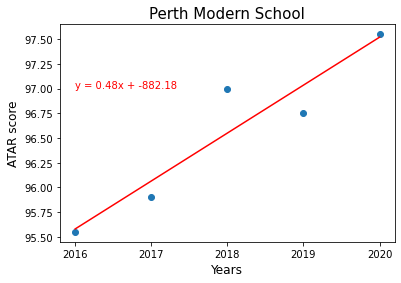

In [167]:
# Perth Modern School Linear Regression
school_score = linear_scores_list[0]
school_name = linear_school_name_array[0]
line_annotate = 97
linear()

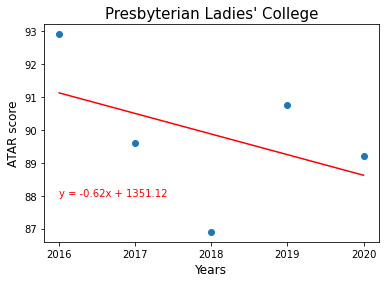

In [168]:
# Presbyterian Ladies' College Linear Regression
school_score = linear_scores_list[1]
school_name = linear_school_name_array[1]
line_annotate = 88
linear()

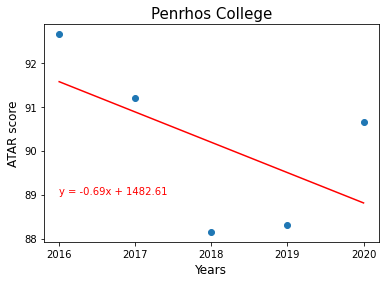

In [169]:
# Penrhos College Linear Regression
school_score = linear_scores_list[2]
school_name = linear_school_name_array[2]
line_annotate = 89
linear()

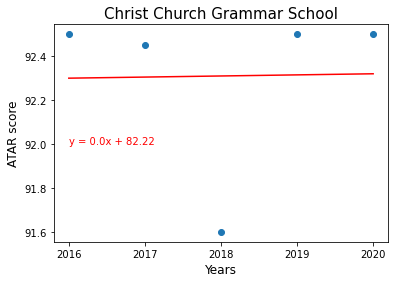

In [170]:
# Christ Church Grammar School Linear Regression
school_score = linear_scores_list[3]
school_name = linear_school_name_array[3]
line_annotate = 92
linear()

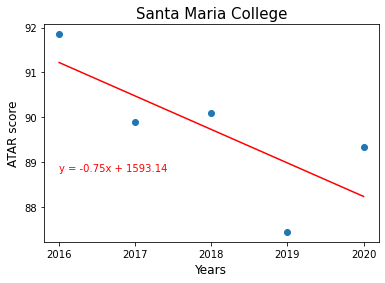

In [171]:
# Santa Maria College Linear Regression
school_score = linear_scores_list[4]
school_name = linear_school_name_array[4]
line_annotate = 88.8
linear()

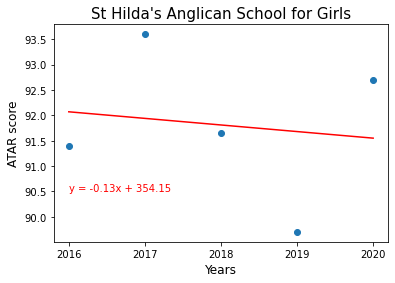

In [172]:
# St Hilda's Anglican School for Girls Linear Regression
school_score = linear_scores_list[5]
school_name = linear_school_name_array[5]
line_annotate = 90.5
linear()

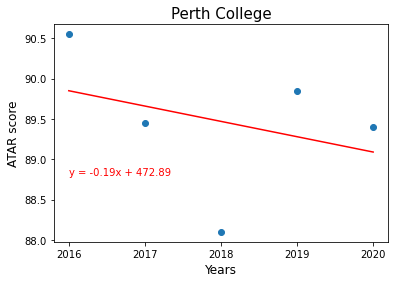

In [173]:
# Perth College for Girls Linear Regression
school_score = linear_scores_list[6]
school_name = linear_school_name_array[6]
line_annotate = 88.8
linear()

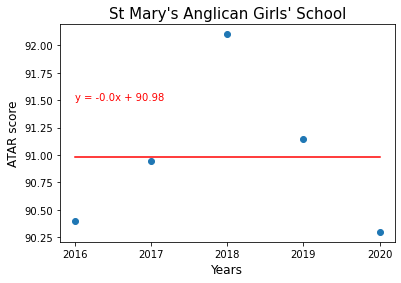

In [174]:
# St Mary's Anglican Girls' School for Girls Linear Regression
school_score = linear_scores_list[7]
school_name = linear_school_name_array[7]
line_annotate = 91.5
linear()

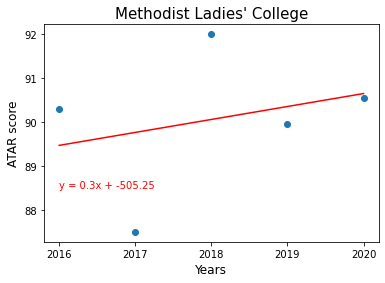

In [175]:
# Methodist Ladies' College Linear Regression
school_score = linear_scores_list[8]
school_name = linear_school_name_array[8]
line_annotate = 88.5
linear()

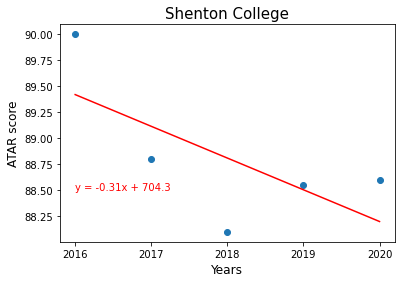

In [176]:
# Shenton College Linear Regression
school_score = linear_scores_list[9]
school_name = linear_school_name_array[9]
line_annotate = 88.5
linear()

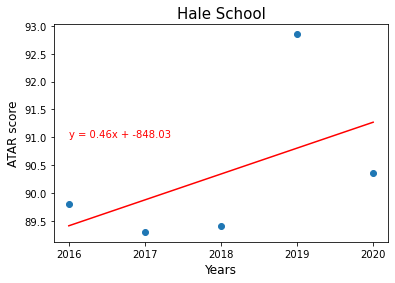

In [177]:
# Hale School Linear Regression
school_score = linear_scores_list[10]
school_name = linear_school_name_array[10]
line_annotate = 91
linear()

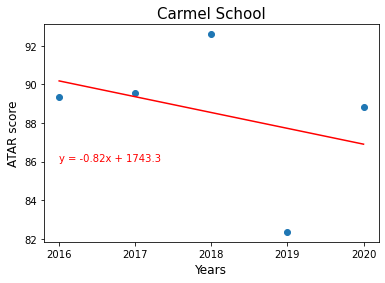

In [178]:
# Carmel School	Linear Regression
school_score = linear_scores_list[11]
school_name = linear_school_name_array[11]
line_annotate = 86
linear()

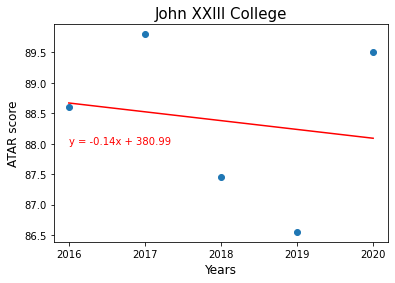

In [179]:
# John XXIII College Linear Regression
school_score = linear_scores_list[12]
school_name = linear_school_name_array[12]
line_annotate = 88
linear()

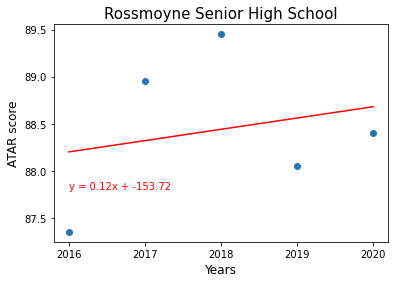

In [180]:
# Rossmoyne Senior High School Linear Regression
school_score = linear_scores_list[13]
school_name = linear_school_name_array[13]
line_annotate = 87.8
linear()

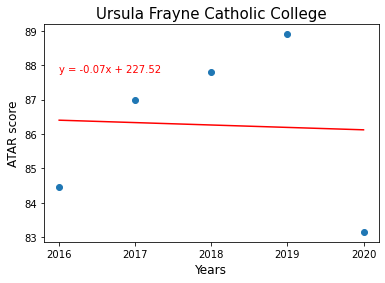

In [181]:
# Ursula Frayne Catholic College Linear Regression
school_score = linear_scores_list[14]
school_name = linear_school_name_array[14]
line_annotate = 87.8
linear()

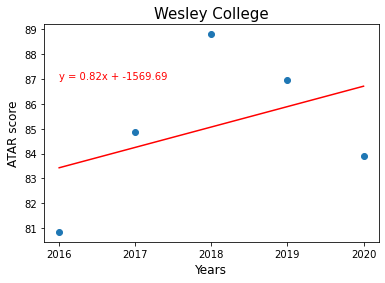

In [182]:
# Wesley College Linear Regression
school_score = linear_scores_list[15]
school_name = linear_school_name_array[15]
line_annotate = 87
linear()

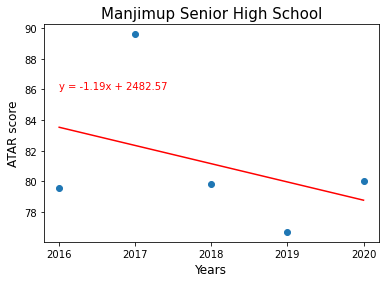

In [183]:
# Manjimup Senior High School Linear Regression
school_score = linear_scores_list[16]
school_name = linear_school_name_array[16]
line_annotate = 86
linear()